In [ ]:
# %pip install sdv

### 23.09.18 New Idea
- tps, latency를 모두 generate하지 않고 config만 generate한 후에 성능 prediction

### Data Prepare (Metric)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A_metrics = pd.read_csv("/home/sein/mk_config/ycsb_AA/results/external_metrics.csv")

In [2]:
A_metrics = pd.read_csv("/home/sein/mk_config/ycsb_AA/results/external_metrics.csv")
# AA_metrics = pd.read_csv("/home/sein/mk_config/ycsb_AA/results/external_metrics.csv")
# B_metrics = pd.read_csv("/home/sein/mk_config/ycsb_B/results/external_metrics.csv")

# metrics = pd.concat([A_metrics, AA_metrics, B_metrics], axis=0)
metrics = A_metrics.drop(['Unnamed: 0'], axis = 1)
# metrics.reset_index(inplace=True)
# metrics = metrics.drop(['index'], axis='columns')

In [3]:
metrics = metrics.replace([np.inf],9999999)

metrics


,tps,latency
0,0.216666,20847397
1,0.322221,12744942
2,3789.313102,1076
3,0.166667,12510551
4,0.266666,10686198
...,...,...
995,0.138889,11836756
996,0.149999,16386967
997,0.227778,19293708
998,0.188888,10529195


### Data Prepare (Config)

In [4]:
import random
import glob
import os
import sys
import pandas as pd

knob_list = glob.glob("/home/sein/mk_config/ycsb_AA/configs/my_*.cnf")


In [5]:
cnt = 0

for xx in range(len(knob_list)):
    path = "/home/sein/mk_config/ycsb_AA/configs/my_{}.cnf".format(xx)
    # knob_list = glob.glob("/home/sein/2023_EDBT/KCC_tpcc_dataset/my_*.cnf")
    a_all = pd.read_csv(path, sep="=", names=['Sample', 'value'], header=2)
    a_all = a_all.set_index("Sample")
    cur_all_df = a_all.T
    
    if cnt == 0:
        A_config = cur_all_df
    else :
        A_config = pd.concat([A_config, cur_all_df], axis=0)
    cnt += 1
A_config = A_config.reset_index()
A_config = A_config.drop(["index"],axis=1)
A_config = A_config.drop(A_config.columns[[0,1]], axis=1)


A_config

Sample,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,489472,200000,13200,4000,18,11520,255852544,28672,94208,0
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,374528,50000,91600,4000,17,15360,402653184,110592,71680,1
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,37120,660000,15600,1,9,1024,851443712,8192,122880,0
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,427776,430000,11200,10000,9,13568,163577856,16384,83968,0
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,388096,880000,11600,4000,25,1536,348127232,126976,57344,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,18000,4276224,945000,610000,1,4096000,432013312,0,29,...,159744,520000,91200,8000,63,7680,163577856,57344,104448,1
996,1,57000,5636096,245000,211000,1,8716288,268435456,1,24,...,455936,940000,89600,2000,29,11520,230686720,69632,61440,0
997,1,2000,622592,45000,537000,1,393216,671088640,7,20,...,308480,810000,66000,8000,48,12544,536870912,81920,108544,1
998,0,38000,5505024,700000,598000,0,9125888,834666496,3,17,...,404992,260000,70400,2000,57,3840,218103808,36864,63488,1


In [6]:
samples = pd.concat([A_config,metrics], axis=1)

samples

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit,tps,latency
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,13200,4000,18,11520,255852544,28672,94208,0,0.216666,20847397
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,91600,4000,17,15360,402653184,110592,71680,1,0.322221,12744942
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,15600,1,9,1024,851443712,8192,122880,0,3789.313102,1076
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,11200,10000,9,13568,163577856,16384,83968,0,0.166667,12510551
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,11600,4000,25,1536,348127232,126976,57344,0,0.266666,10686198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,18000,4276224,945000,610000,1,4096000,432013312,0,29,...,91200,8000,63,7680,163577856,57344,104448,1,0.138889,11836756
996,1,57000,5636096,245000,211000,1,8716288,268435456,1,24,...,89600,2000,29,11520,230686720,69632,61440,0,0.149999,16386967
997,1,2000,622592,45000,537000,1,393216,671088640,7,20,...,66000,8000,48,12544,536870912,81920,108544,1,0.227778,19293708
998,0,38000,5505024,700000,598000,0,9125888,834666496,3,17,...,70400,2000,57,3840,218103808,36864,63488,1,0.188888,10529195


In [7]:
### boolean에 해당하는 열 정리

discrete_columns = [samples.columns[0], samples.columns[5],samples.columns[10],samples.columns[13],
                    samples.columns[17],samples.columns[24],samples.columns[30],samples.columns[31],
                    samples.columns[32],samples.columns[34],samples.columns[36],samples.columns[37],
                    samples.columns[58],samples.columns[60],samples.columns[64],samples.columns[68],
                    samples.columns[72],samples.columns[73],samples.columns[74],samples.columns[75],
                    samples.columns[77],samples.columns[80],samples.columns[82],samples.columns[83],
                    samples.columns[90],samples.columns[91],samples.columns[92],samples.columns[93],
                    samples.columns[118],samples.columns[123],samples.columns[124],samples.columns[125],
                    samples.columns[126]]

In [8]:
### continuous 열 정리
all_columns = samples.columns
continuous_columns = all_columns.drop(discrete_columns)

In [9]:
for i in range(len(discrete_columns)):
    a = discrete_columns[i]
    samples = samples.astype({a:'int'})

In [10]:
for i in range(len(continuous_columns)):
    a = continuous_columns[i]
    samples = samples.astype({a:'float'})

### config - metric prediction (with raw data)

In [11]:
### TabNet
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import torch


X_all = np.array(A_config)
Y_all = np.array(metrics)

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.3, shuffle=True)
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler = MinMaxScaler().fit(y_train)

scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)
scaled_y_train = Y_scaler.transform(y_train)
scaled_y_test = Y_scaler.transform(y_test)

# Tabnet 모델 생성
regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) ### Basic

# 모델 학습
regressor.fit(X_train=scaled_X_train, y_train=scaled_y_train,
              eval_set=[(scaled_X_test, scaled_y_test)],
              patience=50, 
              batch_size = 64,
              max_epochs=10000,
              eval_metric=['mse'])

# regressor.fit(X_train=scaled_X_train, y_train=scaled_y_train)



# predictions_array =[]
# CV_score_array    =[]

# CV_score_array.append(regressor.best_cost)
# predictions_array.append(np.expm1(regressor.predict(scaled_X_test)))

# predictions = np.mean(predictions_array,axis=0)

# 테스트 데이터로 예측
# y_pred = rf_regressor.predict(scaled_X_test)
predictions = regressor.predict(scaled_X_test)

test_score = mean_squared_error(y_pred = predictions, y_true = scaled_y_test)
# 성능 평가
print('BEST VALID SCORE : ', regressor.best_cost)
print('MSE_SCORE : ', test_score)


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.81923 | val_0_mse: 0.13514 |  0:00:00s
epoch 10 | loss: 0.03563 | val_0_mse: 0.04972 |  0:00:02s
epoch 20 | loss: 0.02019 | val_0_mse: 0.05418 |  0:00:03s
epoch 30 | loss: 0.02026 | val_0_mse: 0.03677 |  0:00:05s
epoch 40 | loss: 0.01492 | val_0_mse: 0.02401 |  0:00:07s
epoch 50 | loss: 0.01557 | val_0_mse: 0.0293  |  0:00:09s
epoch 60 | loss: 0.01168 | val_0_mse: 0.01042 |  0:00:10s
epoch 70 | loss: 0.01295 | val_0_mse: 0.01907 |  0:00:12s
epoch 80 | loss: 0.0129  | val_0_mse: 0.01416 |  0:00:14s
epoch 90 | loss: 0.01187 | val_0_mse: 0.0164  |  0:00:15s

Early stopping occurred at epoch 93 with best_epoch = 43 and best_val_0_mse = 0.00897
BEST VALID SCORE :  0.008966289546507897
MSE_SCORE :  0.008966289546507897


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [12]:
predictions, scaled_y_test
from sklearn.metrics import r2_score

r2_score(predictions[:,0], scaled_y_test[:,0]),r2_score(predictions[:,1], scaled_y_test[:,1])

(0.8032696954772378, 0.6281639101907502)

In [13]:
predictions, scaled_y_test
from sklearn.metrics import r2_score

r2_score(predictions, scaled_y_test)

0.715716814636395

### LHS SAMPLING

In [14]:
import pandas as pd

knob_info = pd.read_csv('Knob_Information_MySQL_v5.7.csv')

knob_min = knob_info['raw_min']
knob_max = knob_info['raw_max']


In [15]:
import numpy as np

def lhs_sampling(min_val, max_val, num_samples):
    # LHS 샘플 생성
    lhs_samples = np.linspace(min_val, max_val, num_samples, endpoint=False)
    np.random.shuffle(lhs_samples)
    return lhs_samples
samples = lhs_sampling(knob_min, knob_max, 10000)

# 생성된 LHS 샘플 출력
print(samples)
# samples.shape

[[1.38800000e-01 8.32886120e+03 1.45895096e+06 ... 1.90746624e+04
  1.90746624e+04 1.38800000e-01]
 [2.50700000e-01 1.50427493e+04 2.63184916e+06 ... 3.36270336e+04
  3.36270336e+04 2.50700000e-01]
 [6.38000000e-02 3.82893620e+03 6.72826163e+05 ... 9.32106240e+03
  9.32106240e+03 6.38000000e-02]
 ...
 [8.43200000e-01 5.05921568e+04 8.84223508e+06 ... 1.10680474e+05
  1.10680474e+05 8.43200000e-01]
 [6.01100000e-01 3.60663989e+04 6.30462423e+06 ... 7.91958528e+04
  7.91958528e+04 6.01100000e-01]
 [8.60100000e-01 5.16061399e+04 9.01937521e+06 ... 1.12878285e+05
  1.12878285e+05 8.60100000e-01]]


In [113]:
samples.shape

(10000, 138)

In [114]:
metrics.shape

(1000, 2)

In [35]:
### TabNet
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import torch

X_all = np.array(A_config)
Y_all = np.array(metrics)
new_X = np.array(samples)

# scaler = MinMaxScaler()

X_scaler = MinMaxScaler().fit(X_all)
Y_scaler = MinMaxScaler().fit(Y_all)
Z_scaler = MinMaxScaler().fit(new_X)

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.2, shuffle=True)


scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)
new_scaled_X_test = Z_scaler.transform(new_X)
all_test = np.concatenate([scaled_X_test, new_scaled_X_test])


scaled_y_train = Y_scaler.transform(y_train)
scaled_y_test = Y_scaler.transform(y_test)


# Tabnet 모델 생성
regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) ### Basic

# 모델 학습
regressor.fit(X_train=scaled_X_train, y_train=scaled_y_train,
              eval_set=[(scaled_X_test, scaled_y_test)],
              patience=50, 
              batch_size = 64,
              max_epochs=10000,
              eval_metric=['mse'])

predictions = regressor.predict(all_test)

print(predictions)


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.76222 | val_0_mse: 0.14385 |  0:00:00s
epoch 10 | loss: 0.05024 | val_0_mse: 0.0541  |  0:00:02s
epoch 20 | loss: 0.01743 | val_0_mse: 0.05572 |  0:00:04s
epoch 30 | loss: 0.01417 | val_0_mse: 0.0334  |  0:00:06s
epoch 40 | loss: 0.01564 | val_0_mse: 0.01286 |  0:00:08s
epoch 50 | loss: 0.01367 | val_0_mse: 0.01224 |  0:00:10s
epoch 60 | loss: 0.00996 | val_0_mse: 0.00886 |  0:00:12s
epoch 70 | loss: 0.01002 | val_0_mse: 0.01097 |  0:00:13s
epoch 80 | loss: 0.01042 | val_0_mse: 0.02029 |  0:00:15s
epoch 90 | loss: 0.00819 | val_0_mse: 0.00906 |  0:00:17s
epoch 100| loss: 0.00943 | val_0_mse: 0.0104  |  0:00:19s
epoch 110| loss: 0.00834 | val_0_mse: 0.00895 |  0:00:21s
epoch 120| loss: 0.00956 | val_0_mse: 0.01535 |  0:00:23s
epoch 130| loss: 0.00843 | val_0_mse: 0.00783 |  0:00:25s

Early stopping occurred at epoch 137 with best_epoch = 87 and best_val_0_mse = 0.00779


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


[[0.00618651 0.52968514]
 [0.7293115  0.00543712]
 [0.00699655 0.5320591 ]
 ...
 [0.00690849 0.53478295]
 [0.0069826  0.52783036]
 [0.00687932 0.53615326]]


In [21]:
# a = Z_scaler.data_max_
# b = Z_scaler.data_min_
# (new_X[0]- b) / (a - b)

In [52]:
### inverse transform 해서 원래 데이터랑 같은지 비교

inverse_transformed_X = X_scaler.inverse_transform(new_scaled_X_test) 
print(inverse_transformed_X)

[[1.38813881e-01 8.32969407e+03 1.45909646e+06 ... 1.90764676e+04
  1.90764676e+04 1.38813881e-01]
 [2.50725073e-01 1.50442536e+04 2.63211197e+06 ... 3.36302942e+04
  3.36302942e+04 2.50725073e-01]
 [6.38063806e-02 3.82931903e+03 6.72893043e+05 ... 9.32189219e+03
  9.32189219e+03 6.38063806e-02]
 ...
 [8.43284328e-01 5.05972164e+04 8.84311899e+06 ... 1.10691440e+05
  1.10691440e+05 8.43284328e-01]
 [6.01160116e-01 3.60700058e+04 6.30525435e+06 ... 7.92036708e+04
  7.92036708e+04 6.01160116e-01]
 [8.60186019e-01 5.16113009e+04 9.02027682e+06 ... 1.12889471e+05
  1.12889471e+05 8.60186019e-01]]


In [37]:
new_X

array([[1.38800000e-01, 8.32886120e+03, 1.45895096e+06, ...,
        1.90746624e+04, 1.90746624e+04, 1.38800000e-01],
       [2.50700000e-01, 1.50427493e+04, 2.63184916e+06, ...,
        3.36270336e+04, 3.36270336e+04, 2.50700000e-01],
       [6.38000000e-02, 3.82893620e+03, 6.72826163e+05, ...,
        9.32106240e+03, 9.32106240e+03, 6.38000000e-02],
       ...,
       [8.43200000e-01, 5.05921568e+04, 8.84223508e+06, ...,
        1.10680474e+05, 1.10680474e+05, 8.43200000e-01],
       [6.01100000e-01, 3.60663989e+04, 6.30462423e+06, ...,
        7.91958528e+04, 7.91958528e+04, 6.01100000e-01],
       [8.60100000e-01, 5.16061399e+04, 9.01937521e+06, ...,
        1.12878285e+05, 1.12878285e+05, 8.60100000e-01]])

In [53]:
new_X.shape , new_scaled_X_test.shape

((10000, 138), (10000, 138))

In [25]:
new_scaled_X_test

array([[0.13881388, 0.13881388, 0.13881388, ..., 0.13881388, 0.13881388,
        0.13881388],
       [0.25072507, 0.25072507, 0.25072507, ..., 0.25072507, 0.25072507,
        0.25072507],
       [0.06380638, 0.06380638, 0.06380638, ..., 0.06380638, 0.06380638,
        0.06380638],
       ...,
       [0.84328433, 0.84328433, 0.84328433, ..., 0.84328433, 0.84328433,
        0.84328433],
       [0.60116012, 0.60116012, 0.60116012, ..., 0.60116012, 0.60116012,
        0.60116012],
       [0.86018602, 0.86018602, 0.86018602, ..., 0.86018602, 0.86018602,
        0.86018602]])

In [117]:
raw_metric_pd = pd.DataFrame(scaled_y_train)
raw_metric_pd

,0,1
0,0.000035,0.516286
1,0.000029,0.827569
2,0.000016,0.503856
3,0.000024,0.457965
4,0.000052,0.548499
...,...,...
795,0.000065,0.590635
796,0.000029,0.470948
797,0.000061,0.555494
798,0.000051,0.708429


In [124]:
inverse_transformed_metrics = Y_scaler.inverse_transform(raw_metric_pd) 
print(inverse_transformed_metrics)

[[2.49999668e-01 1.15921570e+07]
 [2.27777691e-01 1.85808570e+07]
 [1.72222014e-01 1.13130960e+07]
 ...
 [3.61110778e-01 1.24724260e+07]
 [3.16665622e-01 1.59060170e+07]
 [2.05554711e-01 1.16899930e+07]]


In [147]:
### 새로운 config에 대해서 Prediction 한 TPS, LATNECY
raw_metric_pd = pd.DataFrame(inverse_transformed_metrics)
new_metrics = pd.DataFrame(predictions)
new_metrics = pd.concat([raw_metric_pd,new_metrics])
# new_metrics = new_metrics.rename(columns={1: "latency"}, inplace=True)
new_metrics.rename(columns={0: "tps", 1:"latency"}, inplace=True)

new_metrics = new_metrics.reset_index()
new_metrics = new_metrics.drop(['index'], axis=1)
new_metrics


,tps,latency
0,0.250000,1.159216e+07
1,0.227778,1.858086e+07
2,0.172222,1.131310e+07
3,0.205555,1.028278e+07
4,0.322221,1.231538e+07
...,...,...
10995,0.707602,2.466106e-02
10996,0.006766,5.405498e-01
10997,0.006908,5.347829e-01
10998,0.006983,5.278304e-01


In [39]:
inverse_transformed_metrics = Y_scaler.inverse_transform(new_metrics) 
print(inverse_transformed_metrics)

[[2.5859659e+01 1.1892988e+07]
 [3.0361890e+03 1.2296813e+05]
 [2.9231823e+01 1.1946286e+07]
 ...
 [2.8865227e+01 1.2007440e+07]
 [2.9173721e+01 1.1851346e+07]
 [2.8743774e+01 1.2038206e+07]]


### 인자 정리
- new_X = samples = LHS Sampling으로 생성한 데이터
- new_metrics = 생성한 데이터에 대해서 TabNET이 예측한 metrics + 원래 metrics (scaling X)
- new_Samples = 원래 config + 생성한 config
- newnewnew = AutoEncoder에 넣을 수 있는 데이터셋

In [153]:
# inversed_new_config = pd.DataFrame(inverse_transformed_samples)
new_X_pd = pd.DataFrame(new_X)
new_X_pd = round(new_X_pd)
for i in range(len(new_X_pd.columns)):
    new_X_pd.rename(columns={new_X_pd.columns[i]: A_config.columns[i]}, inplace=True)   
    
new_Samples = pd.concat([A_config,new_X_pd] , axis=0)

In [157]:
# new_Samples = new_Samples.reset_index()
new_Samples = new_Samples.drop(['index'], axis=1)
new_Samples

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,489472,200000,13200,4000,18,11520,255852544,28672,94208,0
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,374528,50000,91600,4000,17,15360,402653184,110592,71680,1
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,37120,660000,15600,1,9,1024,851443712,8192,122880,0
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,427776,430000,11200,10000,9,13568,163577856,16384,83968,0
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,388096,880000,11600,4000,25,1536,348127232,126976,57344,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0.0,1819.0,321690.0,30300.0,30300.0,0.0,321690.0,32534377.0,0.0,1.0,...,15901.0,30300.0,3418.0,304.0,3.0,496.0,32535370.0,4964.0,4964.0,0.0
10996,1.0,54876.0,9590626.0,914600.0,914600.0,1.0,9590626.0,982044272.0,6.0,27.0,...,479515.0,914600.0,91494.0,9146.0,59.0,14985.0,982044360.0,119966.0,119966.0,1.0
10997,1.0,50592.0,8842235.0,843200.0,843200.0,1.0,8842235.0,905379106.0,6.0,25.0,...,442082.0,843200.0,84383.0,8432.0,54.0,13815.0,905379267.0,110680.0,110680.0,1.0
10998,1.0,36066.0,6304624.0,601100.0,601100.0,1.0,6304624.0,645426210.0,4.0,18.0,...,315156.0,601100.0,60270.0,6011.0,39.0,9848.0,645426619.0,79196.0,79196.0,1.0


In [158]:
new_Samples

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,489472,200000,13200,4000,18,11520,255852544,28672,94208,0
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,374528,50000,91600,4000,17,15360,402653184,110592,71680,1
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,37120,660000,15600,1,9,1024,851443712,8192,122880,0
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,427776,430000,11200,10000,9,13568,163577856,16384,83968,0
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,388096,880000,11600,4000,25,1536,348127232,126976,57344,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0.0,1819.0,321690.0,30300.0,30300.0,0.0,321690.0,32534377.0,0.0,1.0,...,15901.0,30300.0,3418.0,304.0,3.0,496.0,32535370.0,4964.0,4964.0,0.0
10996,1.0,54876.0,9590626.0,914600.0,914600.0,1.0,9590626.0,982044272.0,6.0,27.0,...,479515.0,914600.0,91494.0,9146.0,59.0,14985.0,982044360.0,119966.0,119966.0,1.0
10997,1.0,50592.0,8842235.0,843200.0,843200.0,1.0,8842235.0,905379106.0,6.0,25.0,...,442082.0,843200.0,84383.0,8432.0,54.0,13815.0,905379267.0,110680.0,110680.0,1.0
10998,1.0,36066.0,6304624.0,601100.0,601100.0,1.0,6304624.0,645426210.0,4.0,18.0,...,315156.0,601100.0,60270.0,6011.0,39.0,9848.0,645426619.0,79196.0,79196.0,1.0


In [143]:
new_Samples['index']

0           0
1           1
2           2
3           3
4           4
         ... 
10995    9995
10996    9996
10997    9997
10998    9998
10999    9999
Name: index, Length: 11000, dtype: int64

### CTGAN

In [11]:
from ctgan import CTGAN
import warnings

warnings.filterwarnings(action='ignore')
# model = CTGAN()

# model.fit(samples)

discrete_columns = [
    'automatic_sp_privileges ',
    'binlog_rows_query_log_events ',
    'end_markers_in_json ',
    'explicit_defaults_for_timestamp ',
    'general_log ',
    'innodb_cmp_per_index_enabled ',
    'innodb_deadlock_detect ',
    'innodb_disable_sort_file_cache ',
    'innodb_file_per_table ',
    'innodb_flush_sync ',
    'innodb_ft_enable_diag_print ',
    'innodb_ft_enable_stopword ',
    'innodb_optimize_fulltext_only ',
    'innodb_print_all_deadlocks ',
    'innodb_random_read_ahead ',
    'innodb_rollback_on_timeout ',
    'innodb_stats_auto_recalc ',
    'innodb_stats_include_delete_marked ',
    'innodb_stats_on_metadata ',
    'innodb_stats_persistent ',
    'innodb_strict_mode ',
    'innodb_table_locks ',
    'innodb_undo_log_truncate ',
    'innodb_use_native_aio ',
    'local_infile ',
    'log_bin_trust_function_creators ',
    'log_queries_not_using_indexes ',
    'log_slow_admin_statements ',
    'query_cache_wlock_invalidate ',
    'session_track_schema ',
    'session_track_state_change ',
    'show_compatibility_56 ',
    'slow_query_log '
    ]

ctgan = CTGAN(epochs=2000)
ctgan.fit(samples, discrete_columns)

synthetic_data = ctgan.sample(10000)

In [14]:
synthetic_data

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit,tps,latency
0,1,64085.491431,8.747672e+06,160171.636959,4.591850e+05,1,8.544584e+06,4.995438e+08,3.588863,6.542287,...,95832.718680,4078.290563,-4.577790,4815.317896,9.015355e+08,-514.846014,138013.936253,0.018053,76.952838,1.110789e+07
1,1,61792.839308,6.597368e+06,629483.068491,9.113013e+05,1,-4.550471e+05,9.822301e+06,3.822552,26.859796,...,70138.992251,6341.479938,50.585249,10552.813350,-3.307830e+07,27402.732569,112756.187261,0.036233,75.834716,1.060039e+07
2,1,23310.265316,6.709582e+06,26325.260818,-8.747573e+03,0,5.220613e+06,4.046126e+08,1.555631,10.057050,...,65777.527050,11421.624374,12.210683,12503.756268,1.034788e+09,77027.341116,95062.807545,0.064618,110.126206,1.126518e+07
3,1,48538.271124,8.823883e+05,199100.861406,2.789380e+05,0,4.801200e+06,9.656499e+08,3.903329,16.059210,...,88987.981405,1179.856665,56.263030,-1026.210579,2.246051e+08,-7348.160568,-19753.728327,0.993212,60.040683,9.119067e+06
4,1,13925.327091,-1.672424e+05,-120534.069950,1.027247e+06,1,3.526529e+06,6.720872e+08,-0.410250,19.474514,...,73839.178953,8067.746573,29.250011,2844.659867,1.131503e+09,-17659.574706,158826.206736,0.992301,-0.235904,-3.357397e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,22248.073645,4.685541e+06,124180.612332,3.697392e+05,0,7.892356e+06,1.061477e+09,1.684589,33.294081,...,112725.705236,6233.339023,15.026341,11440.708834,5.858132e+08,57309.152641,119290.948988,1.082748,-39.677783,1.621545e+07
9996,0,47054.506291,7.833876e+06,37228.616557,6.548665e+05,0,2.977341e+06,-1.366531e+08,-0.143210,25.108205,...,78417.305576,295.616080,43.100744,12781.691361,4.336462e+08,77211.620861,135956.085373,1.029357,127.101861,9.406102e+06
9997,0,72366.997854,3.119984e+06,469447.709394,1.090637e+05,0,1.753155e+06,1.137558e+09,7.918809,33.336667,...,110135.484874,9522.523577,35.038805,1558.445011,1.156508e+09,5746.158774,19258.133733,0.060749,140.152546,8.951039e+06
9998,0,68464.588553,4.009622e+06,560153.892303,3.908274e+05,0,3.058926e+06,2.889850e+08,2.572098,26.476444,...,5805.180024,6387.513114,38.372945,9973.563127,5.765792e+08,83129.098072,136245.327957,0.960728,89.047643,1.418551e+07


In [15]:
info = pd.read_csv('/home/sein/mk_config/Knob_Information_MySQL_v5.7.csv')

In [16]:
info_d = info.astype({'raw_min':'float'})

In [17]:
info.dtypes

name            object
type            object
unit             int64
s_unit          object
raw_min          int64
d_f_min          int64
raw_max        float64
d_f_max          int64
raw_default    float64
d_f_default    float64
q_factor         int64
dtype: object

In [18]:
r = synthetic_data.loc[:, [col for col in synthetic_data.columns if col != 'latency' ]]
synthetic_data_wo = r.loc[:, [col for col in r.columns if col != 'tps' ]]

In [19]:
synthetic_data_wo.dtypes

automatic_sp_privileges                       int64
back_log                                    float64
binlog_cache_size                           float64
binlog_group_commit_sync_delay              float64
binlog_group_commit_sync_no_delay_count     float64
                                             ...   
thread_cache_size                           float64
tmp_table_size                              float64
transaction_alloc_block_size                float64
transaction_prealloc_size                   float64
updatable_views_with_limit                  float64
Length: 138, dtype: object

### 최소값 최대값 수정

In [20]:
import pandas as pd


# synthetic_data_rr 초기화
synthetic_data_rr = synthetic_data_wo.copy()

# 열별로 조건 확인하고 값 수정
for j in range(len(info)):
    a = synthetic_data_wo.columns[j]
    min_value = info['raw_min'][j]
    max_value = info['raw_max'][j]
    
    for i in range(len(synthetic_data_wo)):
        if synthetic_data_wo[a][i] < min_value:
            synthetic_data_rr.at[i, a] = min_value
        elif synthetic_data_wo[a][i] > max_value:
            synthetic_data_rr.at[i, a] = max_value



In [21]:
synthetic_data_wo

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,1,64085.491431,8.747672e+06,160171.636959,4.591850e+05,1,8.544584e+06,4.995438e+08,3.588863,6.542287,...,303279.226303,8.717806e+05,95832.718680,4078.290563,-4.577790,4815.317896,9.015355e+08,-514.846014,138013.936253,0.018053
1,1,61792.839308,6.597368e+06,629483.068491,9.113013e+05,1,-4.550471e+05,9.822301e+06,3.822552,26.859796,...,557077.299573,5.109300e+05,70138.992251,6341.479938,50.585249,10552.813350,-3.307830e+07,27402.732569,112756.187261,0.036233
2,1,23310.265316,6.709582e+06,26325.260818,-8.747573e+03,0,5.220613e+06,4.046126e+08,1.555631,10.057050,...,-89574.361693,8.844924e+05,65777.527050,11421.624374,12.210683,12503.756268,1.034788e+09,77027.341116,95062.807545,0.064618
3,1,48538.271124,8.823883e+05,199100.861406,2.789380e+05,0,4.801200e+06,9.656499e+08,3.903329,16.059210,...,314310.306079,7.555240e+05,88987.981405,1179.856665,56.263030,-1026.210579,2.246051e+08,-7348.160568,-19753.728327,0.993212
4,1,13925.327091,-1.672424e+05,-120534.069950,1.027247e+06,1,3.526529e+06,6.720872e+08,-0.410250,19.474514,...,-11570.409368,2.723890e+05,73839.178953,8067.746573,29.250011,2844.659867,1.131503e+09,-17659.574706,158826.206736,0.992301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,22248.073645,4.685541e+06,124180.612332,3.697392e+05,0,7.892356e+06,1.061477e+09,1.684589,33.294081,...,573848.757631,1.073631e+06,112725.705236,6233.339023,15.026341,11440.708834,5.858132e+08,57309.152641,119290.948988,1.082748
9996,0,47054.506291,7.833876e+06,37228.616557,6.548665e+05,0,2.977341e+06,-1.366531e+08,-0.143210,25.108205,...,187843.348650,2.000303e+05,78417.305576,295.616080,43.100744,12781.691361,4.336462e+08,77211.620861,135956.085373,1.029357
9997,0,72366.997854,3.119984e+06,469447.709394,1.090637e+05,0,1.753155e+06,1.137558e+09,7.918809,33.336667,...,363592.431761,1.116926e+06,110135.484874,9522.523577,35.038805,1558.445011,1.156508e+09,5746.158774,19258.133733,0.060749
9998,0,68464.588553,4.009622e+06,560153.892303,3.908274e+05,0,3.058926e+06,2.889850e+08,2.572098,26.476444,...,43178.220479,8.789930e+05,5805.180024,6387.513114,38.372945,9973.563127,5.765792e+08,83129.098072,136245.327957,0.960728


### synthetic_data_rr 
- 새롭게 augmentation한 data 중에서 min, max값 원래 knob value range와 비교해서 더 작은 값이 있을 경우에는 min값으로 , 더 큰 값이 있으면 max값으로 바꾼 데이터프레임

In [22]:
# pd.options.display.max_rows = 60

pd.set_option('display.max_columns', None)

In [23]:
synthetic_data_rr

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,end_markers_in_json,eq_range_index_dive_limit,expire_logs_days,explicit_defaults_for_timestamp,flush_time,ft_min_word_len,ft_query_expansion_limit,general_log,group_concat_max_len,innodb_adaptive_hash_index_parts,innodb_adaptive_max_sleep_delay,innodb_autoextend_increment,innodb_buffer_pool_size,innodb_change_buffer_max_size,innodb_cmp_per_index_enabled,innodb_commit_concurrency,innodb_compression_failure_threshold_pct,innodb_compression_level,innodb_compression_pad_pct_max,innodb_concurrency_tickets,innodb_deadlock_detect,innodb_disable_sort_file_cache,innodb_file_per_table,innodb_fill_factor,innodb_flush_sync,innodb_ft_cache_size,innodb_ft_enable_diag_print,innodb_ft_enable_stopword,innodb_ft_max_token_size,innodb_ft_min_token_size,innodb_ft_num_word_optimize,innodb_ft_result_cache_limit,innodb_ft_sort_pll_degree,innodb_ft_total_cache_size,innodb_io_capacity,innodb_io_capacity_max,innodb_log_buffer_size,innodb_log_file_size,innodb_log_write_ahead_size,innodb_lru_scan_depth,innodb_max_dirty_pages_pct,innodb_max_dirty_pages_pct_lwm,innodb_max_purge_lag,innodb_max_purge_lag_delay,innodb_max_undo_log_size,innodb_old_blocks_time,innodb_online_alter_log_max_size,innodb_open_files,innodb_optimize_fulltext_only,innodb_page_cleaners,innodb_print_all_deadlocks,innodb_purge_batch_size,innodb_purge_rseg_truncate_frequency,innodb_purge_threads,innodb_random_read_ahead,innodb_read_ahead_threshold,innodb_read_io_threads,innodb_replication_delay,innodb_rollback_on_timeout,innodb_rollback_segments,innodb_sort_buffer_size,innodb_spin_wait_delay,innodb_stats_auto_recalc,innodb_stats_include_delete_marked,innodb_stats_on_metadata,innodb_stats_persistent,innodb_stats_transient_sample_pages,innodb_strict_mode,innodb_sync_array_size,innodb_sync_spin_loops,innodb_table_locks,innodb_thread_concurrency,innodb_undo_log_truncate,innodb_use_native_aio,innodb_write_io_threads,join_buffer_size,key_buffer_size,key_cache_age_threshold,key_cache_block_size,key_cache_division_limit,local_infile,log_bin_trust_function_creators,log_queries_not_using_indexes,log_slow_admin_statements,long_query_time,max_allowed_packet,max_binlog_cache_size,max_binlog_size,max_binlog_stmt_cache_size,max_digest_length,max_error_count,max_heap_table_size,max_length_for_sort_data,max_points_in_geometry,max_prepared_stmt_count,max_sort_length,max_write_lock_count,net_buffer_length,net_read_timeout,net_write_timeout,ngram_token_size,optimizer_prune_level,optimizer_search_depth,preload_buffer_size,query_alloc_block_size,query_cache_limit,query_cache_min_res_unit,query_cache_size,query_cache_wlock_invalidate,query_prealloc_size,range_alloc_block_size,read_buffer_size,read_rnd_buffer_size,session_track_schema,session_track_state_change,show_compatibility_56,slow_query_log,sort_buffer_size,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,1,60000.000000,8.747672e+06,160171.636959,459184.987304,1,8.544584e+06,4.995438e+08,3.588863,6.542287,1,1574.947021,1.470791,0,86.262480,16.000000,475.053541,0,566.207083,53.554468,0.000000,1000.000000,1.210614e+10,38.682255,0,938.001259,62.097571,4.703273,45.324514,26630.379754,0,1,0,82.035314,0,1.600000e+06,0,0,66.228217,12.736954,2683.258068,1.897024e+08,25.040419,4.541274e+08,9008.599798,92958.497896,2.934497e+08,4.194304e+06,12937.146108,6111.768987,89.912354,60.638866,0.000000,1.000000e+07,7.761078e+09,18440.660990,3.332364e+08,58029.748703,1,1.219661,1,2544.776018,1.000000,13.650362,0,29.564392,9.818207,50111.730791,1,110.786766,1.226056e+07,106.125087,0,0,0,1,89818.547109,1,327.709688,68.654056,0,94.401670,0,1,47.712440,5.290412e+06,9.469647e+0

### 새롭게 생성한 knob 정보 + tps, latency

In [24]:
m_columns = synthetic_data[['tps','latency']]

# m_columns
full_samples = pd.concat([synthetic_data_rr,m_columns], axis = 1)

full_samples

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,end_markers_in_json,eq_range_index_dive_limit,expire_logs_days,explicit_defaults_for_timestamp,flush_time,ft_min_word_len,ft_query_expansion_limit,general_log,group_concat_max_len,innodb_adaptive_hash_index_parts,innodb_adaptive_max_sleep_delay,innodb_autoextend_increment,innodb_buffer_pool_size,innodb_change_buffer_max_size,innodb_cmp_per_index_enabled,innodb_commit_concurrency,innodb_compression_failure_threshold_pct,innodb_compression_level,innodb_compression_pad_pct_max,innodb_concurrency_tickets,innodb_deadlock_detect,innodb_disable_sort_file_cache,innodb_file_per_table,innodb_fill_factor,innodb_flush_sync,innodb_ft_cache_size,innodb_ft_enable_diag_print,innodb_ft_enable_stopword,innodb_ft_max_token_size,innodb_ft_min_token_size,innodb_ft_num_word_optimize,innodb_ft_result_cache_limit,innodb_ft_sort_pll_degree,innodb_ft_total_cache_size,innodb_io_capacity,innodb_io_capacity_max,innodb_log_buffer_size,innodb_log_file_size,innodb_log_write_ahead_size,innodb_lru_scan_depth,innodb_max_dirty_pages_pct,innodb_max_dirty_pages_pct_lwm,innodb_max_purge_lag,innodb_max_purge_lag_delay,innodb_max_undo_log_size,innodb_old_blocks_time,innodb_online_alter_log_max_size,innodb_open_files,innodb_optimize_fulltext_only,innodb_page_cleaners,innodb_print_all_deadlocks,innodb_purge_batch_size,innodb_purge_rseg_truncate_frequency,innodb_purge_threads,innodb_random_read_ahead,innodb_read_ahead_threshold,innodb_read_io_threads,innodb_replication_delay,innodb_rollback_on_timeout,innodb_rollback_segments,innodb_sort_buffer_size,innodb_spin_wait_delay,innodb_stats_auto_recalc,innodb_stats_include_delete_marked,innodb_stats_on_metadata,innodb_stats_persistent,innodb_stats_transient_sample_pages,innodb_strict_mode,innodb_sync_array_size,innodb_sync_spin_loops,innodb_table_locks,innodb_thread_concurrency,innodb_undo_log_truncate,innodb_use_native_aio,innodb_write_io_threads,join_buffer_size,key_buffer_size,key_cache_age_threshold,key_cache_block_size,key_cache_division_limit,local_infile,log_bin_trust_function_creators,log_queries_not_using_indexes,log_slow_admin_statements,long_query_time,max_allowed_packet,max_binlog_cache_size,max_binlog_size,max_binlog_stmt_cache_size,max_digest_length,max_error_count,max_heap_table_size,max_length_for_sort_data,max_points_in_geometry,max_prepared_stmt_count,max_sort_length,max_write_lock_count,net_buffer_length,net_read_timeout,net_write_timeout,ngram_token_size,optimizer_prune_level,optimizer_search_depth,preload_buffer_size,query_alloc_block_size,query_cache_limit,query_cache_min_res_unit,query_cache_size,query_cache_wlock_invalidate,query_prealloc_size,range_alloc_block_size,read_buffer_size,read_rnd_buffer_size,session_track_schema,session_track_state_change,show_compatibility_56,slow_query_log,sort_buffer_size,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit,tps,latency
0,1,60000.000000,8.747672e+06,160171.636959,459184.987304,1,8.544584e+06,4.995438e+08,3.588863,6.542287,1,1574.947021,1.470791,0,86.262480,16.000000,475.053541,0,566.207083,53.554468,0.000000,1000.000000,1.210614e+10,38.682255,0,938.001259,62.097571,4.703273,45.324514,26630.379754,0,1,0,82.035314,0,1.600000e+06,0,0,66.228217,12.736954,2683.258068,1.897024e+08,25.040419,4.541274e+08,9008.599798,92958.497896,2.934497e+08,4.194304e+06,12937.146108,6111.768987,89.912354,60.638866,0.000000,1.000000e+07,7.761078e+09,18440.660990,3.332364e+08,58029.748703,1,1.219661,1,2544.776018,1.000000,13.650362,0,29.564392,9.818207,50111.730791,1,110.786766,1.226056e+07,106.125087,0,0,0,1,89818.547109,1,327.709688,68.654056,0,94.401670,0,1,47.712440,5.290412e+06

In [25]:
synthetic_data_wo

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,end_markers_in_json,eq_range_index_dive_limit,expire_logs_days,explicit_defaults_for_timestamp,flush_time,ft_min_word_len,ft_query_expansion_limit,general_log,group_concat_max_len,innodb_adaptive_hash_index_parts,innodb_adaptive_max_sleep_delay,innodb_autoextend_increment,innodb_buffer_pool_size,innodb_change_buffer_max_size,innodb_cmp_per_index_enabled,innodb_commit_concurrency,innodb_compression_failure_threshold_pct,innodb_compression_level,innodb_compression_pad_pct_max,innodb_concurrency_tickets,innodb_deadlock_detect,innodb_disable_sort_file_cache,innodb_file_per_table,innodb_fill_factor,innodb_flush_sync,innodb_ft_cache_size,innodb_ft_enable_diag_print,innodb_ft_enable_stopword,innodb_ft_max_token_size,innodb_ft_min_token_size,innodb_ft_num_word_optimize,innodb_ft_result_cache_limit,innodb_ft_sort_pll_degree,innodb_ft_total_cache_size,innodb_io_capacity,innodb_io_capacity_max,innodb_log_buffer_size,innodb_log_file_size,innodb_log_write_ahead_size,innodb_lru_scan_depth,innodb_max_dirty_pages_pct,innodb_max_dirty_pages_pct_lwm,innodb_max_purge_lag,innodb_max_purge_lag_delay,innodb_max_undo_log_size,innodb_old_blocks_time,innodb_online_alter_log_max_size,innodb_open_files,innodb_optimize_fulltext_only,innodb_page_cleaners,innodb_print_all_deadlocks,innodb_purge_batch_size,innodb_purge_rseg_truncate_frequency,innodb_purge_threads,innodb_random_read_ahead,innodb_read_ahead_threshold,innodb_read_io_threads,innodb_replication_delay,innodb_rollback_on_timeout,innodb_rollback_segments,innodb_sort_buffer_size,innodb_spin_wait_delay,innodb_stats_auto_recalc,innodb_stats_include_delete_marked,innodb_stats_on_metadata,innodb_stats_persistent,innodb_stats_transient_sample_pages,innodb_strict_mode,innodb_sync_array_size,innodb_sync_spin_loops,innodb_table_locks,innodb_thread_concurrency,innodb_undo_log_truncate,innodb_use_native_aio,innodb_write_io_threads,join_buffer_size,key_buffer_size,key_cache_age_threshold,key_cache_block_size,key_cache_division_limit,local_infile,log_bin_trust_function_creators,log_queries_not_using_indexes,log_slow_admin_statements,long_query_time,max_allowed_packet,max_binlog_cache_size,max_binlog_size,max_binlog_stmt_cache_size,max_digest_length,max_error_count,max_heap_table_size,max_length_for_sort_data,max_points_in_geometry,max_prepared_stmt_count,max_sort_length,max_write_lock_count,net_buffer_length,net_read_timeout,net_write_timeout,ngram_token_size,optimizer_prune_level,optimizer_search_depth,preload_buffer_size,query_alloc_block_size,query_cache_limit,query_cache_min_res_unit,query_cache_size,query_cache_wlock_invalidate,query_prealloc_size,range_alloc_block_size,read_buffer_size,read_rnd_buffer_size,session_track_schema,session_track_state_change,show_compatibility_56,slow_query_log,sort_buffer_size,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,1,64085.491431,8.747672e+06,160171.636959,4.591850e+05,1,8.544584e+06,4.995438e+08,3.588863,6.542287,1,1574.947021,1.470791,0,86.262480,16.015962,475.053541,0,566.207083,53.554468,-27351.139698,1143.532864,1.210614e+10,38.682255,0,938.001259,62.097571,4.703273,45.324514,26630.379754,0,1,0,82.035314,0,-9.266127e+06,0,0,66.228217,12.736954,2683.258068,1.897024e+08,25.040419,4.541274e+08,9008.599798,92958.497896,2.934497e+08,-1.600774e+08,12937.146108,6111.768987,89.912354,60.638866,-2043.437805,1.040643e+07,7.761078e+09,18440.660990,3.332364e+08,58029.748703,1,1.219661,1,2544.776018,-15.948480,13.650362,0,29.564392,9.818207,50111.730791,1,110.786766,1.226056e+07,106.125087,0,0,0,1,89818.547109,1,327.709688,68.654056,0,94.401670,0,1,47.712440,5.290412e+06

### Augmentation한 Data Plot 찍어보기

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler,StandardScaler


# input_array = np.array(inputs.cpu())

# data_d = input_array
n_components = 2

scaler = MinMaxScaler()
input_array = scaler.fit_transform(samples)


tsne_model = TSNE(n_components=n_components)

r = tsne_model.fit_transform(input_array)

# print(tsne_model.fit_transform(input_array))

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from sklearn.datasets import load_digit
import torch


# output_array = model(torch.tensor(X_scaler).cuda().float())
# output_array = outputs.cpu().detach().numpy()
# output_array = model(X_scaler)

# torch.Tensor().cuda()
# output_array = outputs.cpu().detach().numpy()


# data_d_out = input_array
n_components = 2

tsne_model = TSNE(n_components=n_components)

# r2 = tsne_model.fit_transform(torch.tensor(synthetic_data).cpu())
scaler = MinMaxScaler()
input_array = scaler.fit_transform(full_samples)
r2 = tsne_model.fit_transform(input_array)


# print(tsne_model.fit_transform(input_array))

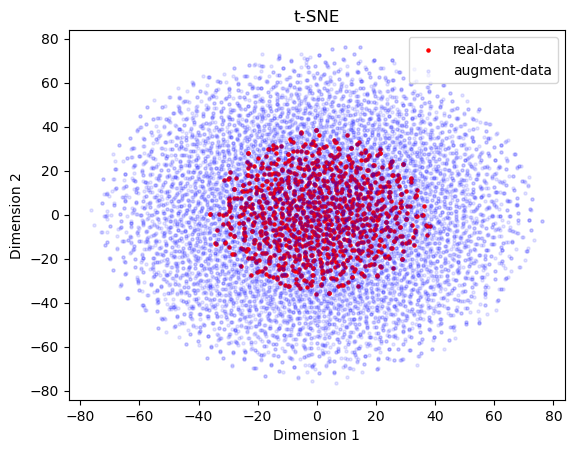

<Figure size 1000x1000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# t-SNE 결과 시각화
plt.scatter(r[:, 0], r[:, 1], s=5, color='red',  label='real-data')
plt.scatter(r2[:, 0], r2[:, 1], s=5, color='blue',alpha=0.1, label='augment-data')

plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


plt.legend(loc='upper right')
plt.figure(figsize=(10,10))
plt.show()


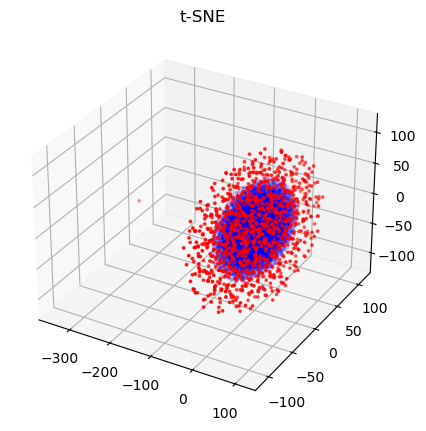

<Figure size 1000x1000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# t-SNE 결과 시각화
# plt.scatter(r[:, 0], r[:, 1], r[:, 2], s=5, color='red', label='real-data')
# plt.scatter(r2[:, 0], r2[:, 1], r2[:, 2], s=5, color='blue', label='reconstruction-data')
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')

ax.scatter(r[:, 0], r[:, 1],r[:,2], color='red', s=3, label='real-data')
ax.scatter(r2[:, 0], r2[:, 1], r2[:,2], color='blue',s=3,alpha=0.1,label='augment-data')



plt.title('t-SNE')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')




# plt.legend(loc='upper right')
plt.figure(figsize=(10,10))
plt.show()


In [ ]:
from sdv.metadata import SingleTableMetadata

data = samples
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data)

In [ ]:
from sdv.single_table import CTGANSynthesizer
import warnings

warnings.filterwarnings(action='ignore')

synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(data)

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    samples,
    synthetic_data,
    metadata
) 

Creating report: 100%|██████████| 4/4 [00:31<00:00,  7.82s/it]



Overall Quality Score: 88.14%

Properties:
Column Shapes: 85.54%
Column Pair Trends: 90.74%


In [61]:
synthetic_data_rr

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,end_markers_in_json,eq_range_index_dive_limit,expire_logs_days,explicit_defaults_for_timestamp,flush_time,ft_min_word_len,ft_query_expansion_limit,general_log,group_concat_max_len,innodb_adaptive_hash_index_parts,innodb_adaptive_max_sleep_delay,innodb_autoextend_increment,innodb_buffer_pool_size,innodb_change_buffer_max_size,innodb_cmp_per_index_enabled,innodb_commit_concurrency,innodb_compression_failure_threshold_pct,innodb_compression_level,innodb_compression_pad_pct_max,innodb_concurrency_tickets,innodb_deadlock_detect,innodb_disable_sort_file_cache,innodb_file_per_table,innodb_fill_factor,innodb_flush_sync,innodb_ft_cache_size,innodb_ft_enable_diag_print,innodb_ft_enable_stopword,innodb_ft_max_token_size,innodb_ft_min_token_size,innodb_ft_num_word_optimize,innodb_ft_result_cache_limit,innodb_ft_sort_pll_degree,innodb_ft_total_cache_size,innodb_io_capacity,innodb_io_capacity_max,innodb_log_buffer_size,innodb_log_file_size,innodb_log_write_ahead_size,innodb_lru_scan_depth,innodb_max_dirty_pages_pct,innodb_max_dirty_pages_pct_lwm,innodb_max_purge_lag,innodb_max_purge_lag_delay,innodb_max_undo_log_size,innodb_old_blocks_time,innodb_online_alter_log_max_size,innodb_open_files,innodb_optimize_fulltext_only,innodb_page_cleaners,innodb_print_all_deadlocks,innodb_purge_batch_size,innodb_purge_rseg_truncate_frequency,innodb_purge_threads,innodb_random_read_ahead,innodb_read_ahead_threshold,innodb_read_io_threads,innodb_replication_delay,innodb_rollback_on_timeout,innodb_rollback_segments,innodb_sort_buffer_size,innodb_spin_wait_delay,innodb_stats_auto_recalc,innodb_stats_include_delete_marked,innodb_stats_on_metadata,innodb_stats_persistent,innodb_stats_transient_sample_pages,innodb_strict_mode,innodb_sync_array_size,innodb_sync_spin_loops,innodb_table_locks,innodb_thread_concurrency,innodb_undo_log_truncate,innodb_use_native_aio,innodb_write_io_threads,join_buffer_size,key_buffer_size,key_cache_age_threshold,key_cache_block_size,key_cache_division_limit,local_infile,log_bin_trust_function_creators,log_queries_not_using_indexes,log_slow_admin_statements,long_query_time,max_allowed_packet,max_binlog_cache_size,max_binlog_size,max_binlog_stmt_cache_size,max_digest_length,max_error_count,max_heap_table_size,max_length_for_sort_data,max_points_in_geometry,max_prepared_stmt_count,max_sort_length,max_write_lock_count,net_buffer_length,net_read_timeout,net_write_timeout,ngram_token_size,optimizer_prune_level,optimizer_search_depth,preload_buffer_size,query_alloc_block_size,query_cache_limit,query_cache_min_res_unit,query_cache_size,query_cache_wlock_invalidate,query_prealloc_size,range_alloc_block_size,read_buffer_size,read_rnd_buffer_size,session_track_schema,session_track_state_change,show_compatibility_56,slow_query_log,sort_buffer_size,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,1,60000.000000,8.747672e+06,160171.636959,459184.987304,1,8.544584e+06,4.995438e+08,3.588863,6.542287,1,1574.947021,1.470791,0,86.262480,16.000000,475.053541,0,566.207083,53.554468,0.000000,1000.000000,1.210614e+10,38.682255,0,938.001259,62.097571,4.703273,45.324514,26630.379754,0,1,0,82.035314,0,1.600000e+06,0,0,66.228217,12.736954,2683.258068,1.897024e+08,25.040419,4.541274e+08,9008.599798,92958.497896,2.934497e+08,4.194304e+06,12937.146108,6111.768987,89.912354,60.638866,0.000000,1.000000e+07,7.761078e+09,18440.660990,3.332364e+08,58029.748703,1,1.219661,1,2544.776018,1.000000,13.650362,0,29.564392,9.818207,50111.730791,1,110.786766,1.226056e+07,106.125087,0,0,0,1,89818.547109,1,327.709688,68.654056,0,94.401670,0,1,47.712440,5.290412e+06,9.469647e+0

In [63]:
full_samples

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,end_markers_in_json,eq_range_index_dive_limit,expire_logs_days,explicit_defaults_for_timestamp,flush_time,ft_min_word_len,ft_query_expansion_limit,general_log,group_concat_max_len,innodb_adaptive_hash_index_parts,innodb_adaptive_max_sleep_delay,innodb_autoextend_increment,innodb_buffer_pool_size,innodb_change_buffer_max_size,innodb_cmp_per_index_enabled,innodb_commit_concurrency,innodb_compression_failure_threshold_pct,innodb_compression_level,innodb_compression_pad_pct_max,innodb_concurrency_tickets,innodb_deadlock_detect,innodb_disable_sort_file_cache,innodb_file_per_table,innodb_fill_factor,innodb_flush_sync,innodb_ft_cache_size,innodb_ft_enable_diag_print,innodb_ft_enable_stopword,innodb_ft_max_token_size,innodb_ft_min_token_size,innodb_ft_num_word_optimize,innodb_ft_result_cache_limit,innodb_ft_sort_pll_degree,innodb_ft_total_cache_size,innodb_io_capacity,innodb_io_capacity_max,innodb_log_buffer_size,innodb_log_file_size,innodb_log_write_ahead_size,innodb_lru_scan_depth,innodb_max_dirty_pages_pct,innodb_max_dirty_pages_pct_lwm,innodb_max_purge_lag,innodb_max_purge_lag_delay,innodb_max_undo_log_size,innodb_old_blocks_time,innodb_online_alter_log_max_size,innodb_open_files,innodb_optimize_fulltext_only,innodb_page_cleaners,innodb_print_all_deadlocks,innodb_purge_batch_size,innodb_purge_rseg_truncate_frequency,innodb_purge_threads,innodb_random_read_ahead,innodb_read_ahead_threshold,innodb_read_io_threads,innodb_replication_delay,innodb_rollback_on_timeout,innodb_rollback_segments,innodb_sort_buffer_size,innodb_spin_wait_delay,innodb_stats_auto_recalc,innodb_stats_include_delete_marked,innodb_stats_on_metadata,innodb_stats_persistent,innodb_stats_transient_sample_pages,innodb_strict_mode,innodb_sync_array_size,innodb_sync_spin_loops,innodb_table_locks,innodb_thread_concurrency,innodb_undo_log_truncate,innodb_use_native_aio,innodb_write_io_threads,join_buffer_size,key_buffer_size,key_cache_age_threshold,key_cache_block_size,key_cache_division_limit,local_infile,log_bin_trust_function_creators,log_queries_not_using_indexes,log_slow_admin_statements,long_query_time,max_allowed_packet,max_binlog_cache_size,max_binlog_size,max_binlog_stmt_cache_size,max_digest_length,max_error_count,max_heap_table_size,max_length_for_sort_data,max_points_in_geometry,max_prepared_stmt_count,max_sort_length,max_write_lock_count,net_buffer_length,net_read_timeout,net_write_timeout,ngram_token_size,optimizer_prune_level,optimizer_search_depth,preload_buffer_size,query_alloc_block_size,query_cache_limit,query_cache_min_res_unit,query_cache_size,query_cache_wlock_invalidate,query_prealloc_size,range_alloc_block_size,read_buffer_size,read_rnd_buffer_size,session_track_schema,session_track_state_change,show_compatibility_56,slow_query_log,sort_buffer_size,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit,tps,latency
0,1,60000.000000,8.747672e+06,160171.636959,459184.987304,1,8.544584e+06,4.995438e+08,3.588863,6.542287,1,1574.947021,1.470791,0,86.262480,16.000000,475.053541,0,566.207083,53.554468,0.000000,1000.000000,1.210614e+10,38.682255,0,938.001259,62.097571,4.703273,45.324514,26630.379754,0,1,0,82.035314,0,1.600000e+06,0,0,66.228217,12.736954,2683.258068,1.897024e+08,25.040419,4.541274e+08,9008.599798,92958.497896,2.934497e+08,4.194304e+06,12937.146108,6111.768987,89.912354,60.638866,0.000000,1.000000e+07,7.761078e+09,18440.660990,3.332364e+08,58029.748703,1,1.219661,1,2544.776018,1.000000,13.650362,0,29.564392,9.818207,50111.730791,1,110.786766,1.226056e+07,106.125087,0,0,0,1,89818.547109,1,327.709688,68.654056,0,94.401670,0,1,47.712440,5.290412e+06

### AE Train set에 추가 (1000 + 10000) AUG Plot

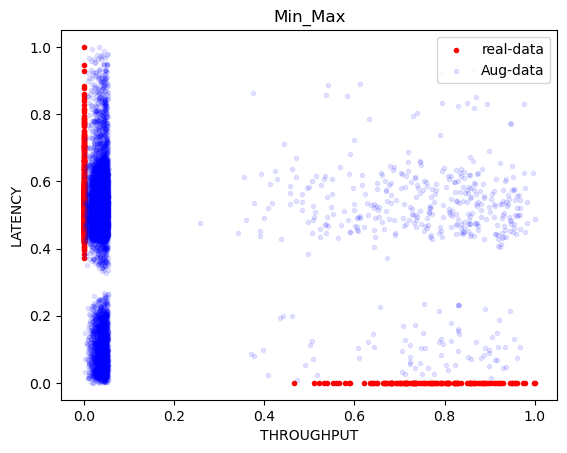

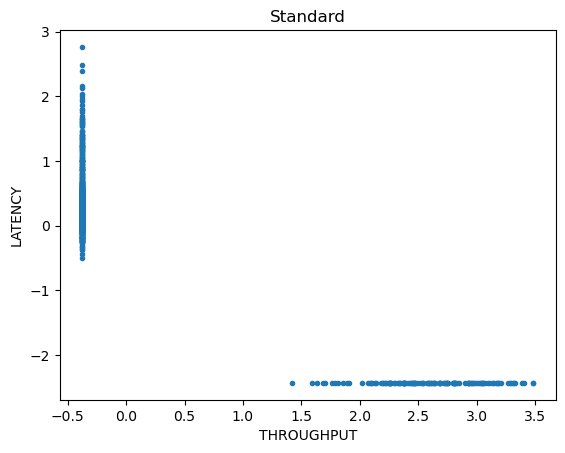

In [26]:
metrics['tps'],metrics['latency']
from sklearn.preprocessing import MinMaxScaler,StandardScaler

mm_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
mm_tps = mm_scaler.fit_transform(metrics['tps'].to_numpy().reshape(-1,1))
mm_latency = mm_scaler.fit_transform(metrics['latency'].to_numpy().reshape(-1,1))

standard_tps = standard_scaler.fit_transform(metrics['tps'].to_numpy().reshape(-1,1))
standard_latency = standard_scaler.fit_transform(metrics['latency'].to_numpy().reshape(-1,1))

mm_aug_tps = mm_scaler.fit_transform(full_samples['tps'].to_numpy().reshape(-1,1))
mm_aug_latency = mm_scaler.fit_transform(full_samples['latency'].to_numpy().reshape(-1,1))


plt.scatter(mm_tps, mm_latency,color='red', label='real-data', s=9)
plt.scatter(mm_aug_tps, mm_aug_latency,color='blue',label='Aug-data',alpha = 0.1, s=9)

plt.legend(loc='upper right')

plt.title("Min_Max")
plt.xlabel("THROUGHPUT")
plt.ylabel("LATENCY")
plt.show()

plt.scatter(standard_tps, standard_latency, s=9)
plt.title("Standard")
plt.xlabel("THROUGHPUT")
plt.ylabel("LATENCY")
plt.show()

### AE Train set에 추가 (1000 + 10000) AUG == new_Samples

In [163]:
for i in range(len(new_X_pd.columns)):
    new_X_pd.rename(columns={new_X_pd.columns[i]: A_config.columns[i]}, inplace=True)   
    
new_Samples = pd.concat([A_config,new_X_pd] , axis=0)

new_Samples = new_Samples.reset_index()
new_Samples = new_Samples.drop(['index'], axis=1)
# new_Samples

newnewwnew = pd.concat([new_Samples, new_metrics], axis = 1)

In [164]:
new_Samples

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,489472,200000,13200,4000,18,11520,255852544,28672,94208,0
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,374528,50000,91600,4000,17,15360,402653184,110592,71680,1
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,37120,660000,15600,1,9,1024,851443712,8192,122880,0
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,427776,430000,11200,10000,9,13568,163577856,16384,83968,0
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,388096,880000,11600,4000,25,1536,348127232,126976,57344,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0.0,1819.0,321690.0,30300.0,30300.0,0.0,321690.0,32534377.0,0.0,1.0,...,15901.0,30300.0,3418.0,304.0,3.0,496.0,32535370.0,4964.0,4964.0,0.0
10996,1.0,54876.0,9590626.0,914600.0,914600.0,1.0,9590626.0,982044272.0,6.0,27.0,...,479515.0,914600.0,91494.0,9146.0,59.0,14985.0,982044360.0,119966.0,119966.0,1.0
10997,1.0,50592.0,8842235.0,843200.0,843200.0,1.0,8842235.0,905379106.0,6.0,25.0,...,442082.0,843200.0,84383.0,8432.0,54.0,13815.0,905379267.0,110680.0,110680.0,1.0
10998,1.0,36066.0,6304624.0,601100.0,601100.0,1.0,6304624.0,645426210.0,4.0,18.0,...,315156.0,601100.0,60270.0,6011.0,39.0,9848.0,645426619.0,79196.0,79196.0,1.0


In [165]:
newnewwnew

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit,tps,latency
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,13200,4000,18,11520,255852544,28672,94208,0,0.250000,1.159216e+07
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,91600,4000,17,15360,402653184,110592,71680,1,0.227778,1.858086e+07
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,15600,1,9,1024,851443712,8192,122880,0,0.172222,1.131310e+07
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,11200,10000,9,13568,163577856,16384,83968,0,0.205555,1.028278e+07
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,11600,4000,25,1536,348127232,126976,57344,0,0.322221,1.231538e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0.0,1819.0,321690.0,30300.0,30300.0,0.0,321690.0,32534377.0,0.0,1.0,...,3418.0,304.0,3.0,496.0,32535370.0,4964.0,4964.0,0.0,0.707602,2.466106e-02
10996,1.0,54876.0,9590626.0,914600.0,914600.0,1.0,9590626.0,982044272.0,6.0,27.0,...,91494.0,9146.0,59.0,14985.0,982044360.0,119966.0,119966.0,1.0,0.006766,5.405498e-01
10997,1.0,50592.0,8842235.0,843200.0,843200.0,1.0,8842235.0,905379106.0,6.0,25.0,...,84383.0,8432.0,54.0,13815.0,905379267.0,110680.0,110680.0,1.0,0.006908,5.347829e-01
10998,1.0,36066.0,6304624.0,601100.0,601100.0,1.0,6304624.0,645426210.0,4.0,18.0,...,60270.0,6011.0,39.0,9848.0,645426619.0,79196.0,79196.0,1.0,0.006983,5.278304e-01


In [27]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import  TensorDataset, DataLoader

X_train, X_test = train_test_split(new_Samples, test_size=0.4, shuffle=True)

scaler = MinMaxScaler()
# new_train = pd.concat([X_train,full_samples])
X_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

scaling_data = np.concatenate((np.array(X_scaler), np.array(X_test_scaler)))
# concat_all_df = pd.DataFrame(concat_all_df)
 
# dataset_tr = TensorDataset(concat_all_df)
# dataset_tr = TensorDataset(concat_all_df)

# dataset_te = TensorDataset(X_test)
# trainloader = DataLoader(concat_all_df, batch_size=50, shuffle=True)
dataset_tr = TensorDataset(torch.tensor(X_scaler))
dataset_te = TensorDataset(torch.tensor(X_test_scaler))

trainloader = torch.utils.data.DataLoader(dataset_tr, batch_size=512, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset_te, batch_size=512, shuffle=True)

#trainloader = torch.utils.data.DataLoader(dataset = X_train, batch_size=50, shuffle=True)
# dataloader_te = DataLoader(dataset_te, batch_size=50, shuffle=True)  
# type(X_train)



In [28]:
scaling_data.shape

(11000, 140)

In [29]:
### 원본

import torch.nn as nn

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        # nn.Linear(140,64),
        # nn.ReLU(),
        # nn.Linear(64,32),
        # nn.ReLU(),
        # nn.Linear(32,16), #잠재변수 15개로 줄임 
        # nn.ReLU())
        nn.Linear(140,128),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,32), #잠재변수 15개로 줄임 
        nn.Sigmoid())
    
    self.decoder = nn.Sequential(
        nn.Linear(32,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128, 140), 
        nn.Sigmoid()
    )
  
  #인코더와 디코더 연산을 차례대로 수행하도록 설정 
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [30]:
# from torch import device
from torch import optim
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model =Autoencoder().to(device)
model = Autoencoder().to(device)
# model = Autoencoder()


critertion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
#lr=1e-4
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
trainloss = []
validationloss = []
epoch_list = []

for epoch in range(15000):
  running_loss = 0
  model.train()
  
  for data in trainloader:
    inputs = data[0].float().to(device)
    optimizer.zero_grad()
    outputs = model(inputs) 
    loss = critertion(inputs, outputs)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    
  train_loss = running_loss / len(trainloader)
  trainloss.append(train_loss)
  # epoch_list.append(epoch)
  
  if epoch % 300 == 0:
    total_val_loss = 0
    model.eval()
    with torch.no_grad():
      running_loss = 0
      
      for data in testloader:
        inputs = data[0].float().to(device)
        # optimizer.zero_grad()
        outputs = model(inputs) 
        loss = critertion(inputs, outputs)
        running_loss += loss.item()
        
      total_val_loss = running_loss / len(testloader)
      validationloss.append(total_val_loss)
        
    # outputs = outputs.view(-1, 1, 28, 28) 
    # trainloss.append(cost)
    # epoch_list.append(epoch)
    # loss = critertion(inputs, outputs)
    # validationloss.append(loss)
    print('[%d] tr_loss : %.3f | val_loss : %.3f' %(epoch +1, train_loss, total_val_loss))

[1] tr_loss : 0.141 | val_loss : 0.139
[301] tr_loss : 0.101 | val_loss : 0.098
[601] tr_loss : 0.093 | val_loss : 0.086
[901] tr_loss : 0.088 | val_loss : 0.083
[1201] tr_loss : 0.086 | val_loss : 0.081
[1501] tr_loss : 0.084 | val_loss : 0.077
[1801] tr_loss : 0.082 | val_loss : 0.074
[2101] tr_loss : 0.081 | val_loss : 0.072
[2401] tr_loss : 0.080 | val_loss : 0.071
[2701] tr_loss : 0.079 | val_loss : 0.071
[3001] tr_loss : 0.078 | val_loss : 0.069
[3301] tr_loss : 0.077 | val_loss : 0.068
[3601] tr_loss : 0.077 | val_loss : 0.067
[3901] tr_loss : 0.076 | val_loss : 0.067
[4201] tr_loss : 0.076 | val_loss : 0.066
[4501] tr_loss : 0.075 | val_loss : 0.066
[4801] tr_loss : 0.075 | val_loss : 0.066
[5101] tr_loss : 0.075 | val_loss : 0.066
[5401] tr_loss : 0.075 | val_loss : 0.065
[5701] tr_loss : 0.074 | val_loss : 0.065
[6001] tr_loss : 0.074 | val_loss : 0.065
[6301] tr_loss : 0.074 | val_loss : 0.065
[6601] tr_loss : 0.074 | val_loss : 0.065
[6901] tr_loss : 0.074 | val_loss : 0.06

In [31]:
outputs.shape

torch.Size([360, 140])

In [ ]:
from table_evaluator import TableEvaluator

print(samples.shape , full_samples.shape)

table_evaluator = TableEvaluator (samples,full_samples, cat_cols = discrete_columns)

table_evaluator.visual_evaluation()

### Optimization in latent space
- Prediction

In [33]:
import torch
import torch.nn as nn
import numpy as np

for data in testloader:
    inputs = data[0].float().to(device)
    with torch.no_grad():
        encoded_vector = model.encoder(inputs)
        print("Encoded Latent Vector:", encoded_vector)


Encoded Latent Vector: tensor([[0.3949, 0.5913, 0.3327,  ..., 0.3489, 0.4776, 0.3926],
        [0.3518, 0.5815, 0.6578,  ..., 0.3456, 0.5078, 0.4172],
        [0.3974, 0.5731, 0.3589,  ..., 0.4647, 0.5257, 0.3799],
        ...,
        [0.5180, 0.6305, 0.5264,  ..., 0.5029, 0.5660, 0.4145],
        [0.3627, 0.5275, 0.4046,  ..., 0.4904, 0.3666, 0.3594],
        [0.4223, 0.5827, 0.4841,  ..., 0.4210, 0.5518, 0.3633]],
       device='cuda:0')


In [39]:
inputs.shape

torch.Size([400, 140])

In [40]:
encoded_vector.shape

torch.Size([400, 32])

In [41]:
latent_space = encoded_vector

In [42]:
latent_space.shape

torch.Size([400, 32])

In [43]:
### metric 값 새로새로! (prediction의 Y값)
### test에 사용한 데이터의 metric값

for data in testloader:
    inputs = data[0].float().to(device)
    inputs_pd = pd.DataFrame(inputs.cpu().numpy())
    new_metric = inputs_pd.iloc[:,[138,139]]
    # optimizer.zero_grad()
    print(new_metric)

          138       139
0    0.000048  0.816695
1    0.000067  0.528750
2    0.000053  0.567648
3    0.000059  0.514030
4    0.000024  0.536934
..        ...       ...
395  0.000012  0.524494
396  0.000024  0.526422
397  0.000044  0.517186
398  0.000021  0.423929
399  0.000033  0.474845

[400 rows x 2 columns]


In [44]:
inputs.shape

torch.Size([400, 140])

In [45]:
new_metric

,138,139
0,0.000048,0.816695
1,0.000067,0.528750
2,0.000053,0.567648
3,0.000059,0.514030
4,0.000024,0.536934
...,...,...
395,0.000012,0.524494
396,0.000024,0.526422
397,0.000044,0.517186
398,0.000021,0.423929


In [ ]:
###XGBRegressor

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
# from sklearn.metrics import explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, precision_score
import numpy as np

X_all = np.array(latent_space.cpu().numpy())
Y_all = np.array(new_metric)

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.4, shuffle=True)
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler = MinMaxScaler().fit(y_train)

scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)
scaled_y_train = Y_scaler.transform(y_train)
scaled_y_test = Y_scaler.transform(y_test)

# xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
#                            colsample_bytree=1, max_depth=7)

estimator = XGBRegressor(
    objective = 'reg:squarederror',
    random_state = 0, n_estimators = 20000, max_depth = 15, learning_rate = 0.001)

my_model_pred = MultiOutputRegressor(estimator = estimator).fit(scaled_X_train, scaled_y_train)


pred = my_model_pred.predict(scaled_X_test)

#rmse
print('RMSE : ',mean_squared_error(scaled_y_test, pred, squared=False))
print('R2_SCORE : ', r2_score(scaled_y_test, pred))
# print('PCC : ', precision_score(y_test, pred, average='weighted'))

# rmse r2 pcc




In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

### Parameter GridSearch
params = {
    # 'n_estimators' : (10000,1000),
    'max_depth' : (12, 17, 10),
    'min_samples_leaf' : (8, 18, 35, 40),
    'min_samples_split' : (8, 16, 20)
}

rf_run = DecisionTreeRegressor(random_state=0)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(scaled_X_train, scaled_y_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 12, 'min_samples_leaf': 35, 'min_samples_split': 8}
최적 예측 정확도: -0.0287


In [ ]:
### Random Forest Regression

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

X_all = np.array(latent_space.cpu().numpy())
Y_all = np.array(new_metric)

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.2, shuffle=True)
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler = MinMaxScaler().fit(y_train)

scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)
scaled_y_train = Y_scaler.transform(y_train)
scaled_y_test = Y_scaler.transform(y_test)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(n_estimators=10000,min_samples_leaf= 35, min_samples_split= 8,max_depth = 12, random_state=0)

# 모델 학습
rf_regressor.fit(scaled_X_train, scaled_y_train)

# 테스트 데이터로 예측
y_pred = rf_regressor.predict(scaled_X_test)

# 성능 평가
print('R2_SCORE : ', r2_score(scaled_y_test, y_pred))


R2_SCORE :  -0.06141254396558471


In [ ]:
### Decision Tree Regression

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

X_all = np.array(latent_space.cpu().numpy())
Y_all = np.array(new_metric)

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.3, shuffle=True)
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler = MinMaxScaler().fit(y_train)

scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)
scaled_y_train = Y_scaler.transform(y_train)
scaled_y_test = Y_scaler.transform(y_test)


Rtree = DecisionTreeRegressor(random_state=0, max_depth = 12, min_samples_leaf = 35, min_samples_split= 8)
Rtree.fit(scaled_X_train, scaled_y_train)

y_pred = rf_regressor.predict(scaled_X_test)


# 성능 평가
print('R2_SCORE : ', r2_score(scaled_y_test, y_pred))

R2_SCORE :  -0.054120549564761256


### TabNet

In [47]:
### TabNet
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

X_all = np.array(latent_space.cpu().numpy())
Y_all = np.array(new_metric)

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.2, shuffle=True)
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler = MinMaxScaler().fit(y_train)

scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)
scaled_y_train = Y_scaler.transform(y_train)
scaled_y_test = Y_scaler.transform(y_test)

# Tabnet 모델 생성
regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) ### Basic

# 모델 학습
regressor.fit(X_train=scaled_X_train, y_train=scaled_y_train,
              eval_set=[(scaled_X_test, scaled_y_test)],
              patience=50, 
              batch_size = 128,
              max_epochs=10000,
              eval_metric=['mse'])

# regressor.fit(X_train=scaled_X_train, y_train=scaled_y_train)



# predictions_array =[]
# CV_score_array    =[]

# CV_score_array.append(regressor.best_cost)
# predictions_array.append(np.expm1(regressor.predict(scaled_X_test)))

# predictions = np.mean(predictions_array,axis=0)

# 테스트 데이터로 예측
# y_pred = rf_regressor.predict(scaled_X_test)
predictions = regressor.predict(scaled_X_test)

test_score = mean_squared_error(y_pred = predictions, y_true = scaled_y_test)
# 성능 평가
print('BEST VALID SCORE : ', regressor.best_cost)
print('MSE_SCORE : ', test_score)


epoch 0  | loss: 0.77251 | val_0_mse: 0.1739799976348877|  0:00:00s
epoch 10 | loss: 0.06535 | val_0_mse: 0.08085999637842178|  0:00:00s
epoch 20 | loss: 0.05187 | val_0_mse: 0.07442999631166458|  0:00:00s
epoch 30 | loss: 0.04041 | val_0_mse: 0.07227999716997147|  0:00:01s
epoch 40 | loss: 0.03361 | val_0_mse: 0.07124000042676926|  0:00:01s
epoch 50 | loss: 0.03414 | val_0_mse: 0.07203999906778336|  0:00:01s
epoch 60 | loss: 0.02618 | val_0_mse: 0.07503999769687653|  0:00:02s
epoch 70 | loss: 0.02267 | val_0_mse: 0.07603999972343445|  0:00:02s
epoch 80 | loss: 0.02378 | val_0_mse: 0.0742499977350235|  0:00:03s
epoch 90 | loss: 0.01807 | val_0_mse: 0.07530000060796738|  0:00:03s
epoch 100| loss: 0.0193  | val_0_mse: 0.0751900002360344|  0:00:03s

Early stopping occurred at epoch 106 with best_epoch = 56 and best_val_0_mse = 0.0702499970793724
BEST VALID SCORE :  0.07024921
MSE_SCORE :  0.07024921


In [ ]:
predictions

<AxesSubplot: >

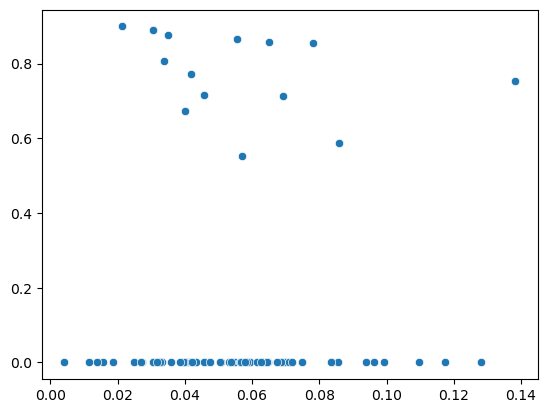

In [60]:
import seaborn as sns
sns.scatterplot(x= predictions[:,0], y=scaled_y_test[:,0])

In [59]:
predictions, scaled_y_test
from sklearn.metrics import r2_score

r2_score(predictions[:,0], scaled_y_test[:,0]),r2_score(predictions[:,1], scaled_y_test[:,1])

(-143.52278654145354, -62.47813190806878)

In [48]:
latent_pd = pd.DataFrame(latent_space.cpu().numpy())
latent_pd_T = latent_pd.T
latent_pd_T.index

RangeIndex(start=0, stop=32, step=1)

In [49]:
### BO 코드

from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

class BO(object):
    def __init__(self, iteration, configs, metrics, config_info_path=None):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics
        self.config_info_path = config_info_path
        # self.reduce_search_space = reduce_search_space
        # self.top_z_knob = top_z_knob
        # self.best_configs = best_configs
        self.min_max_same_knobs = []
        
        self._get_config_info()
        self._init_pbounds()
    
    def _get_config_info(self):
        if self.config_info_path is None:
            self.config_info = pd.read_csv('/home/sein/mk_config/Knob_Information_MySQL_v5.7.csv', index_col=0)
        else:
            self.config_info = pd.read_csv(self.config_info_path, index_col=0)
        
        # if self.top_z_knob is not None:
        #     self.config_info = self.config_info.loc[self.top_z_knob]
        #     self.configs = self.configs[self.top_z_knob]
            

#     def _get_history(self):
#         self.history_configs = self.smac.runhistory.get_configs()
    
    def _init_pbounds(self):
        self.pbounds = {}
        
        # for name in self.config_info.index:
        #     knob = self.config_info.loc[name]
        #     knob_type = knob['type']
        #     knob_min = knob['raw_min']
        #     knob_max = knob['raw_max']
            
        #     # if self.reduce_search_space:
        #     #     knob_min = self.best_configs[name].min()
        #     #     knob_max = self.best_configs[name].max()
        #     #     if knob_min == knob_max:
        #     #         self.min_max_same_knobs.append(name)
        #     #         knob_max += 1
            
        #     if knob_type == 'boolean' or knob_type == 'integer':
        #         self.pbounds[name] = (int(knob_min), int(knob_max))
        #     elif knob_type == 'float':
        #         self.pbounds[name] = (float(knob_min), float(knob_max))
                
        for v in latent_pd_T.index:
            # self.pbounds[v] = (0,18)
            self.pbounds[str(v)] = (0, 1)
    
    def train_regression_model(self):
        X_all = np.array(self.configs)
        Y_all = np.array(self.metrics)
        
        cnt = 0
        while(True):
            X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.3, shuffle=True)         
            
            self.X_scaler = MinMaxScaler().fit(X_train)
            self.y_scaler = MinMaxScaler().fit(y_train)

            scaled_X_train = self.X_scaler.transform(X_train)
            scaled_X_test = self.X_scaler.transform(X_test)
            scaled_y_train = self.y_scaler.transform(y_train)
            scaled_y_test = self.y_scaler.transform(y_test)

            estimator = TabNetRegressor(verbose = 100, seed = 42, optimizer_fn=torch.optim.AdamW)

            estimator.fit(X_train=scaled_X_train, y_train=scaled_y_train,
              eval_set=[(scaled_X_test, scaled_y_test)],
              patience=50, 
              batch_size = 128,
              max_epochs=10000,
              eval_metric=['mse'])
            pred = estimator.predict(scaled_X_test)
            accuracy = mean_squared_error(y_pred = pred, y_true = scaled_y_test)

            cnt += 1
            print(cnt, accuracy)
            if accuracy < 0.058 or cnt > 10:
                break


            # print('BEST VALID SCORE : ', regressor.best_cost)

        self.model = estimator
    
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)        
        scaled_X = self.X_scaler.transform([x])
        
        res = self.model.predict(scaled_X)
        res = res[:,0] / res[:,1]
        
        return res.squeeze()
#         print(y)
        
#         X = pd.DataFrame(config.get_dictionary().values(), index=self.config_info.index).T
#         X = np.array(X)
#         scaled_X = self.X_scaler.transform(X)
        
#         res = self.model.predict(scaled_X)
#         res = res[:,1] / res[:,0]
        
#         return res # a smaller result means better
    
    
    def tune(self):
        self.optimizer = BayesianOptimization(f=self._target_function, pbounds=self.pbounds, verbose=2, random_state=2)
        # self.optimizer = BayesianOptimization(f=self._target_function, verbose=2, random_state=2)
        self.acquisition_function = UtilityFunction(kind="ei", xi=0.01)
        self.optimizer.maximize(n_iter=self.iteration, acquisition_function=self.acquisition_function)
    
    
    def plot_history(self):
        self.y_obs = - np.array([res["target"] for res in self.optimizer.res])
        
        self.his_inc = []
        inc = np.inf
        ## Get minimum results on each iteration
        for res in self.y_obs:
            if res < inc:
                inc = res
            self.his_inc.append(inc)
#             res.append(his_res)

        plt.plot(self.his_inc)
        plt.xlabel('Iteration')
        plt.ylabel('result')
        plt.show()

### 밑에 다 돌린거고 decoding해서 값 확인해보기

In [50]:
tuner1 = BO(iteration=2000, 
           configs=latent_space.cpu().numpy(),
           metrics=new_metric
           )
tuner1.train_regression_model()
tuner1.tune()
# tuner1.plot_history()

epoch 0  | loss: 0.87541 | val_0_mse: 0.23455999791622162|  0:00:00s

Early stopping occurred at epoch 99 with best_epoch = 49 and best_val_0_mse = 0.052969999611377716
1 0.05297486
|   iter    |  target   |     0     |     1     |    10     |    11     |    12     |    13     |    14     |    15     |    16     |    17     |    18     |    19     |     2     |    20     |    21     |    22     |    23     |    24     |    25     |    26     |    27     |    28     |    29     |     3     |    30     |    31     |     4     |     5     |     6     |     7     |     8     |     9     |
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [175]:
ex_data = [0.7246, 0.1305, 0.6983, 0.9586, 0.1505, 0.01784, 0.6084, 0.2533, 0.8599, 0.08903,
           0.822, 0.8512, 0.924, 0.107, 0.08001, 0.1044, 0.6501, 0.9044, 0.1169, 0.5679, 0.04017,
           0.9941, 0.988, 0.9882, 0.9579, 0.8702, 0.8252, 0.811, 0.6573, 0.9738, 0.4664, 0.8155 ]



In [168]:
ex_data = [0.8309, 0.2519, 0.7978, 0.8153, 0.8473, 0.9173, 0.1522, 0.7254, 0.8383, 0.995, 0.009098,
           0.1957, 0.7131, 0.0605, 0.6983, 0.05282, 0.03844, 0.7963, 0.9009, 0.05872, 0.2053, 0.9701,
           0.8831, 0.9154, 0.8639, 0.2572, 0.758, 0.3078, 0.00385, 0.1006, 0.4622, 0.01492 ]


In [1]:
ex_data = [0.8342, 0.9566, 0.2233, 0.1837, 0.3622, 0.1014, 0.3314, 0.2496, 0.5538, 0.7232, 0.9408, 
           0.1717, 0.4927, 0.5404, 0.5923, 0.8231, 0.8567, 0.9466, 0.6102, 0.6246, 0.3165, 0.3197,
           0.7078, 0.3519, 0.1434, 0.3318, 0.9624, 0.4613, 0.5949, 0.4703, 0.3634, 0.2245]  


In [2]:
ex_data = torch.tensor(ex_data)
ex_data = ex_data.to('cuda:0')  # ex_data를 GPU로 이동

with torch.no_grad():
    decode_value = model.decoder(ex_data)
    print("Decoded Value:", decode_value)

NameError: name 'torch' is not defined

In [101]:
for x in decode_value:
    print(x)

tensor(2.8999e-30, device='cuda:0')
tensor(0.0237, device='cuda:0')
tensor(0.9210, device='cuda:0')
tensor(0.8579, device='cuda:0')
tensor(0.4808, device='cuda:0')
tensor(0., device='cuda:0')
tensor(0.0325, device='cuda:0')
tensor(0.2886, device='cuda:0')
tensor(0.5288, device='cuda:0')
tensor(0.0899, device='cuda:0')
tensor(1., device='cuda:0')
tensor(0.9754, device='cuda:0')
tensor(0.4505, device='cuda:0')
tensor(1.0380e-15, device='cuda:0')
tensor(0.6000, device='cuda:0')
tensor(0.5532, device='cuda:0')
tensor(0.3722, device='cuda:0')
tensor(1., device='cuda:0')
tensor(0.1204, device='cuda:0')
tensor(0.9601, device='cuda:0')
tensor(0.7175, device='cuda:0')
tensor(0.2005, device='cuda:0')
tensor(0.0495, device='cuda:0')
tensor(0.4541, device='cuda:0')
tensor(0.9778, device='cuda:0')
tensor(0.2314, device='cuda:0')
tensor(0.1762, device='cuda:0')
tensor(0.3936, device='cuda:0')
tensor(0.2042, device='cuda:0')
tensor(0.8718, device='cuda:0')
tensor(4.8021e-16, device='cuda:0')
tensor(7

In [177]:
import math


real_values = [math.exp(x) for x in decode_value]  #지수함수 없는 상태

print(real_values)

[2.718281828459045, 2.533948189359457, 1.0986455972349665, 2.1394827384695483, 2.5189820902634312, 2.526718956770657, 1.4124067455491605, 1.2560120875879546, 1.416098825484989, 1.5214809076065952, 1.002088298587843, 1.6724036473049442, 1.3436965048539025, 1.0004195129050162, 2.0445800976152553, 1.1143339547958768, 1.0994256047005, 2.718281828459045, 1.0718044622575131, 2.586597976368862, 2.1003096814138194, 2.1594429904813057, 1.9790578200360178, 1.659860456889501, 2.718281828459045, 2.6874615732142217, 2.551579306729276, 2.6246851151937984, 2.045565137773532, 1.2961247879099895, 2.718281828459045, 1.7443431501511453, 1.0, 1.0625384736237145, 2.7090003889200394, 1.0053380656826616, 1.0013594606991203, 1.0000000000000449, 1.1378702213869036, 1.9802505294696398, 2.5882297980866786, 1.1625139710763177, 2.1741146419998136, 1.2231307565063647, 2.311915663182159, 1.8320587208142112, 1.0633736550381194, 2.69182342783395, 1.2319209111714304, 1.4752467113702668, 1.3297112186808793, 1.1935157723

In [178]:
### 원본

import numpy as np

# real_values 리스트를 NumPy 배열로 변환
real_values = np.array(real_values)
rescaled_actual = scaler.inverse_transform(real_values.reshape(1,-1))

In [179]:
# rescaled_actual.shape
# real_values.shape
rescaled_actual


array([[2.71828183e+00, 1.52035357e+05, 1.15136692e+07, 2.13378532e+06,
        2.50990616e+06, 2.52671896e+00, 1.48034013e+07, 1.34336461e+09,
        9.91269178e+00, 4.56444272e+01, 1.00208830e+00, 1.67240365e+04,
        9.40587553e+00, 1.00041951e+00, 3.68024418e+02, 1.77150093e+01,
        1.09942560e+03, 2.71828183e+00, 4.35552612e+03, 1.32275157e+03,
        2.10030968e+06, 2.15180522e+03, 3.29486991e+10, 8.29930228e+01,
        2.71828183e+00, 2.68746157e+03, 2.55157931e+02, 2.36221660e+01,
        1.53417385e+02, 1.29612183e+05, 2.71828183e+00, 1.74434315e+00,
        1.00000000e+00, 1.05628463e+02, 2.70900039e+00, 8.01086350e+07,
        1.00135946e+00, 1.00000000e+00, 2.85226723e+02, 3.16840085e+01,
        2.42940682e+04, 1.24807736e+09, 6.83975539e+01, 1.58310343e+09,
        2.29879651e+04, 1.82406637e+05, 1.14152296e+09, 2.87613135e+09,
        2.00650487e+04, 1.47049424e+04, 1.31641411e+02, 1.18158061e+02,
        1.59587516e+05, 2.24075478e+07, 1.92245846e+10, 6.175209

In [180]:
pd.options.display.float_format = '{:.9f}'.format #지수함수 없이 출력하는 option

rescaled_actual_pd = pd.DataFrame(rescaled_actual)
rescaled_actual_pd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139
0,2.718281828,152035.357413378,11513669.219802130,2133785.324777200,2509906.161902377,2.526718957,14803401.284090487,1343364613.369719505,9.912691778,45.644427228,1.002088299,16724.036473049,9.405875534,1.000419513,368.024417571,17.715009322,1099.425604700,2.718281828,4355.526116766,1322.751565924,2100309.681413820,2151.805218519,32948699126.304065704,82.993022844,2.718281828,2687.461573214,255.157930673,23.622166037,153.417385333,129612.182666211,2.718281828,1.744343150,1.000000000,105.628462626,2.709000389,80108635.029563710,1.001359461,1.000000000,285.226723354,31.684008472,24294.068182780,1248077357.757892370,68.397553902,1583103433.366511106,22987.965065503,182406.636848933,1141522959.579356194,2876131353.747042656,20065.048702113,14704.942442566,131.641410649,118.158061466,159587.516210409,22407547.771917224,19224584594.414367676,61752.098710548,1345751663.373611212,143803.291523701,1.000000000,72.931253419,2.718281828,6030.492443359,128.621635098,59.264530089,2.718281828,121.005985767,166.891374655,69685.053922608,2.718254933,163.285942308,91244292.385482624,254.125126632,1.000000000,2.718281828,1.000000000,2.705678910,214205.151722010,2.389144425,1469.193864370,253.578521014,1.000117783,258.133769915,2.718281828,2.718281828,164.360114285,26479716.096102100,2708736970.724185944,25375.982382453,34654.625863872,100.138053095,2.718281828,1.000111942,2.718281828,2.160295624,479.325895027,2131207974.700310946,2792430392.944087505,4658107463.120953560,4608605961.203967094,1231284.273976773,109575.431960958,1131506065.113816977,8815440.065276965,1432954.877333453,1158754.511594555,9033015.950469848,1995179.471328039,2511008.148202806,377.559762611,322.067496051,10.945524909,2.716756493,79.420876024,179592115.424646646,68176016.895257637,2596177940.893105984,166311351.171006441,1279013030.154454231,1.000000000,98887805.052618310,144207414.075236112,177865257.253717899,68048649.091536418,1.466874502,2.718281828,2.718281828,1.000002106,97551900.121240571,1000412.188860651,1049118.799526642,228289.312072096,15788.518442932,72.126684874,29102.826903714,1679708496.797112226,131696.767370415,149074.758004281,1.168544297,4222.502021102,30191952.453982528


In [161]:
# len(A_config.columns)
rescaled_actual_pd.iloc[0][1]

61436.229006324575

In [182]:
for i in range (len(A_config.columns)):
    print('{} = {}'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i],2)))

automatic_sp_privileges  = 2.72
back_log  = 152035.36
binlog_cache_size  = 11513669.22
binlog_group_commit_sync_delay  = 2133785.32
binlog_group_commit_sync_no_delay_count  = 2509906.16
binlog_rows_query_log_events  = 2.53
binlog_stmt_cache_size  = 14803401.28
bulk_insert_buffer_size  = 1343364613.37
default_week_format  = 9.91
div_precision_increment  = 45.64
end_markers_in_json  = 1.0
eq_range_index_dive_limit  = 16724.04
expire_logs_days  = 9.41
explicit_defaults_for_timestamp  = 1.0
flush_time  = 368.02
ft_min_word_len  = 17.72
ft_query_expansion_limit  = 1099.43
general_log  = 2.72
group_concat_max_len  = 4355.53
innodb_adaptive_hash_index_parts  = 1322.75
innodb_adaptive_max_sleep_delay  = 2100309.68
innodb_autoextend_increment  = 2151.81
innodb_buffer_pool_size  = 32948699126.3
innodb_change_buffer_max_size  = 82.99
innodb_cmp_per_index_enabled  = 2.72
innodb_commit_concurrency  = 2687.46
innodb_compression_failure_threshold_pct  = 255.16
innodb_compression_level  = 23.62
innodb

### Data Prepare (Metric)

In [158]:
inputs

tensor([[0.0000e+00, 1.9999e-01, 2.7472e-01,  ..., 0.0000e+00, 2.5393e-05,
         5.5890e-01],
        [1.0000e+00, 8.3333e-01, 2.4619e-02,  ..., 0.0000e+00, 2.6730e-05,
         5.1992e-01],
        [1.0000e+00, 6.6666e-01, 1.2466e-01,  ..., 1.0000e+00, 7.2171e-05,
         4.9469e-01],
        ...,
        [1.0000e+00, 9.3333e-01, 7.5615e-01,  ..., 1.0000e+00, 1.7374e-05,
         4.3178e-01],
        [1.0000e+00, 4.9984e-02, 8.4838e-01,  ..., 0.0000e+00, 1.8711e-05,
         5.3462e-01],
        [0.0000e+00, 6.4999e-01, 9.5623e-01,  ..., 1.0000e+00, 2.5393e-05,
         5.3893e-01]], device='cuda:0')

In [124]:
latent_pd = pd.DataFrame(latent_space.cpu().numpy())

In [127]:
latent_pd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.739686,3.828686,1.652943,4.827423,2.400748,3.672786,0.0,0.0,1.051731,2.765533,2.328941,6.540833,3.163663,4.077005,2.623121,0.0,2.023202,1.931337,2.904802,2.631545,3.034909,2.069007,2.389846,1.221170,0.0,1.757820,2.423846,0.0,3.376463,0.0,0.0,4.204070
1,5.263201,4.982790,3.039382,0.937511,3.944671,3.973503,0.0,0.0,2.720342,3.109445,7.129198,2.421449,2.519826,2.566425,5.555007,0.0,6.304241,4.550933,2.547660,1.511670,4.295227,3.176923,2.138120,2.607466,0.0,6.696853,4.443738,0.0,4.051492,0.0,0.0,4.196002
2,2.766529,3.934936,3.985363,8.824937,2.800091,3.820795,0.0,0.0,3.465561,2.104327,2.924572,1.036899,4.624174,1.789211,3.822195,0.0,3.855425,6.226820,2.086607,2.721859,3.656491,7.108167,1.398559,4.138853,0.0,5.400802,4.325433,0.0,2.952841,0.0,0.0,2.552230
3,2.518008,2.992872,1.849876,3.105592,1.760748,5.047376,0.0,0.0,4.425196,5.215411,5.812379,2.419034,3.874475,3.489141,3.192498,0.0,2.619721,3.345405,3.742889,5.348268,4.671769,2.296950,1.058514,3.009339,0.0,4.251121,5.161115,0.0,3.539448,0.0,0.0,5.888244
4,5.710105,3.119369,5.798205,1.655647,12.115639,3.281065,0.0,0.0,7.373196,2.274594,4.255859,5.133362,3.946908,4.535933,6.791177,0.0,2.498708,5.733562,4.409940,3.117545,5.725585,1.837201,3.865963,12.683617,0.0,3.366748,4.133466,0.0,3.142618,0.0,0.0,3.934982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,4.376726,2.973006,1.929322,1.804700,3.990704,2.082718,0.0,0.0,6.948726,3.968873,5.486206,1.961821,3.856718,4.884863,3.910616,0.0,2.983663,1.855559,5.642768,1.984998,1.719367,0.608689,2.078119,2.691597,0.0,4.484377,2.292664,0.0,1.137102,0.0,0.0,1.345621
396,9.931121,2.924120,7.188254,3.110448,9.753383,5.154171,0.0,0.0,7.669095,2.752270,2.582700,7.504115,3.361691,5.864507,11.000066,0.0,1.853562,7.554099,4.985822,3.244969,3.621013,7.307350,3.714561,14.271664,0.0,7.430314,8.832792,0.0,0.822277,0.0,0.0,4.305506
397,5.663233,7.589723,6.272685,1.718795,4.167714,5.629080,0.0,0.0,9.432640,5.620521,6.807207,3.970119,2.691149,5.694302,13.940556,0.0,2.146896,6.978596,4.964777,2.491496,4.077055,0.278757,5.440994,3.077384,0.0,11.976365,5.347006,0.0,2.691532,0.0,0.0,6.947793
398,4.824186,3.774930,6.257770,4.998737,7.097552,4.055510,0.0,0.0,3.116205,4.473438,5.437254,10.025055,5.286506,2.654964,3.325086,0.0,6.870083,3.196509,4.759892,6.332176,4.249042,2.689435,3.173205,9.702465,0.0,3.561816,0.646306,0.0,6.430585,0.0,0.0,5.452132


In [140]:
latent_pd.max()

0     13.221277
1     11.478708
2     11.184992
3     12.917171
4     12.115639
5      9.768948
6      0.000000
7      0.000000
8     11.189557
9      9.044129
10    11.367462
11    10.141627
12     7.989879
13    11.597285
14    17.549595
15     0.000000
16    12.435203
17    15.429522
18    11.269625
19    10.515278
20    11.656007
21    13.599747
22    13.877734
23    15.734437
24     0.000000
25    15.759394
26    12.802032
27     0.000000
28    10.702847
29     0.000000
30     0.000000
31    10.890145
dtype: float32

### Tabnet type 나눈거

In [ ]:
### TabNet
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

X_all = np.array(latent_space.cpu().numpy())
Y_all = np.array(new_metric)

### 데이터 나누기
### boolean에 해당하는 열 정리

discrete_columns = [samples.columns[0], samples.columns[5],samples.columns[10],samples.columns[13],
                    samples.columns[17],samples.columns[24],samples.columns[30],samples.columns[31],
                    samples.columns[32],samples.columns[34],samples.columns[36],samples.columns[37],
                    samples.columns[58],samples.columns[60],samples.columns[64],samples.columns[68],
                    samples.columns[72],samples.columns[73],samples.columns[74],samples.columns[75],
                    samples.columns[77],samples.columns[80],samples.columns[82],samples.columns[83],
                    samples.columns[90],samples.columns[91],samples.columns[92],samples.columns[93],
                    samples.columns[118],samples.columns[123],samples.columns[124],samples.columns[125],
                    samples.columns[126]]

discrete_idxs = [0, 5, 10, 13, 17, 24, 30, 31, 32, 34, 36, 37, 58, 60, 64, 68, 72, 73, 74, 75, 77, 80, 82,
                 83, 90, 91, 92, 93, 118, 123, 124, 125, 126]

discrete_dims = 

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.2, shuffle=True)
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler = MinMaxScaler().fit(y_train)

scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)
scaled_y_train = Y_scaler.transform(y_train)
scaled_y_test = Y_scaler.transform(y_test)

# Tabnet 모델 생성
regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) ### Basic

# 모델 학습
regressor.fit(X_train=scaled_X_train, y_train=scaled_y_train,
              eval_set=[(scaled_X_test, scaled_y_test)],
              patience=50, 
              batch_size = 128,
              max_epochs=10000,
              eval_metric=['mse'])

# regressor.fit(X_train=scaled_X_train, y_train=scaled_y_train)



# predictions_array =[]
# CV_score_array    =[]

# CV_score_array.append(regressor.best_cost)
# predictions_array.append(np.expm1(regressor.predict(scaled_X_test)))

# predictions = np.mean(predictions_array,axis=0)

# 테스트 데이터로 예측
# y_pred = rf_regressor.predict(scaled_X_test)
predictions = regressor.predict(scaled_X_test)

test_score = mean_squared_error(y_pred = predictions, y_true = scaled_y_test)
# 성능 평가
print('BEST VALID SCORE : ', regressor.best_cost)
print('MSE_SCORE : ', test_score)


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

X_all = np.array(new_knobs)
Y_all = np.array(new_metric)

est = XGBRegressor()

param_grid = {
    'n_estimators' : [15000, 20000, 25000],
    'max_depth' : [12,13,14,15],
    'learning_rate' : [0.1, 0.001],  
}

grid_search = GridSearchCV(estimator=est, param_grid=param_grid, scoring='accuracy', cv = 3)

grid_search.fit(X_all,Y_all)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

### ㅎㅎ..

In [135]:
#####Shap_value

###XGBRegressor

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
# from sklearn.metrics import explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, precision_score
import numpy as np

X_all = np.array(new_knobs)
Y_all = np.array(new_metric)

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.4, shuffle=True)
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler = MinMaxScaler().fit(y_train)

scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)
scaled_y_train = Y_scaler.transform(y_train)
scaled_y_test = Y_scaler.transform(y_test)

# xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
#                            colsample_bytree=1, max_depth=7)

estimator = XGBRegressor(
    objective = 'reg:squarederror',
    random_state = 2, n_estimators = 15000, max_depth = 12, learning_rate = 0.01)

my_model_pred = MultiOutputRegressor(estimator = estimator).fit(scaled_X_train, scaled_y_train)


pred = my_model_pred.predict(scaled_X_test)

#rmse
print('RMSE : ',mean_squared_error(scaled_y_test, pred, squared=False))
print('R2_SCORE : ', r2_score(scaled_y_test, pred))
# print('PCC : ', precision_score(y_test, pred, average='weighted'))

# rmse r2 pcc




RMSE :  0.07473983514026226
R2_SCORE :  0.9198065356603133


- Optimization

In [151]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

class BO(object):
    def __init__(self, iteration, configs, metrics,config_info_path=None):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics
        self.config_info_path = config_info_path
        # self.reduce_search_space = reduce_search_space
        # self.top_z_knob = top_z_knob
        # self.best_configs = best_configs
        self.min_max_same_knobs = []
        
        self._get_config_info()
        self._init_pbounds()
    
    def _get_config_info(self):
        if self.config_info_path is None:
            self.config_info = pd.read_csv('/home/sein/mk_config/Knob_Information_MySQL_v5.7.csv', index_col=0)
        else:
            self.config_info = pd.read_csv(self.config_info_path, index_col=0)
        
        # if self.top_z_knob is not None:
        #     self.config_info = self.config_info.loc[self.top_z_knob]
        #     self.configs = self.configs[self.top_z_knob]
            

#     def _get_history(self):
#         self.history_configs = self.smac.runhistory.get_configs()
    
    def _init_pbounds(self):
        self.pbounds = {}
        
        for name in self.config_info.index:
            knob = self.config_info.loc[name]
            knob_type = knob['type']
            knob_min = knob['raw_min']
            knob_max = knob['raw_max']
            
            # if self.reduce_search_space:
            #     knob_min = self.best_configs[name].min()
            #     knob_max = self.best_configs[name].max()
            #     if knob_min == knob_max:
            #         self.min_max_same_knobs.append(name)
            #         knob_max += 1
            
            if knob_type == 'boolean' or knob_type == 'integer':
                self.pbounds[name] = (int(knob_min), int(knob_max))
            elif knob_type == 'float':
                self.pbounds[name] = (float(knob_min), float(knob_max))
    
    def train_regression_model(self):
        X_all = np.array(self.configs)
        Y_all = np.array(self.metrics)

        cnt = 0
        while(True):
            X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.3, shuffle=True)
            self.X_scaler = MinMaxScaler().fit(X_train)
            self.y_scaler = MinMaxScaler().fit(y_train)

            scaled_X_train = self.X_scaler.transform(X_train)
            scaled_X_test = self.X_scaler.transform(X_test)
            scaled_y_train = self.y_scaler.transform(y_train)
            scaled_y_test = self.y_scaler.transform(y_test)

            estimator = XGBRegressor(
                objective = 'reg:squarederror',
                random_state = 2, n_estimators = 15000, max_depth = 12, learning_rate = 0.01)

            my_model_pred = MultiOutputRegressor(estimator = estimator).fit(scaled_X_train, scaled_y_train)
            pred = my_model_pred.predict(scaled_X_test)
            accuracy = r2_score(scaled_y_test, pred)

            cnt += 1
            print(cnt, accuracy)
            if accuracy > 0.45 or cnt > 10:
                break

        #rmse
        print('RMSE : ',mean_squared_error(scaled_y_test, pred, squared=False))
        print('R2_SCORE : ', r2_score(scaled_y_test, pred))

        self.model = my_model_pred
    
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)        
        scaled_X = self.X_scaler.transform([x])
        
        res = self.model.predict(scaled_X)
        res = res[:,0] / res[:,1]
        
        return res.squeeze()
#         print(y)
        
#         X = pd.DataFrame(config.get_dictionary().values(), index=self.config_info.index).T
#         X = np.array(X)
#         scaled_X = self.X_scaler.transform(X)
        
#         res = self.model.predict(scaled_X)
#         res = res[:,1] / res[:,0]
        
#         return res # a smaller result means better
    
    
    def tune(self):
        self.optimizer = BayesianOptimization(f=self._target_function, pbounds=self.pbounds, verbose=2, random_state=2)
        # self.optimizer = BayesianOptimization(f=self._target_function, verbose=2, random_state=2)
        self.acquisition_function = UtilityFunction(kind="ei", xi=0.01)
        self.optimizer.maximize(n_iter=self.iteration, acquisition_function=self.acquisition_function)
    
    
    def plot_history(self):
        self.y_obs = - np.array([res["target"] for res in self.optimizer.res])
        
        self.his_inc = []
        inc = np.inf
        ## Get minimum results on each iteration
        for res in self.y_obs:
            if res < inc:
                inc = res
            self.his_inc.append(inc)
#             res.append(his_res)

        plt.plot(self.his_inc)
        plt.xlabel('Iteration')
        plt.ylabel('result')
        plt.show()

In [152]:
tuner1 = BO(iteration=150, 
           configs=new_knobs,
           metrics=new_metric
           )
tuner1.train_regression_model()
tuner1.tune()
# tuner1.plot_history()

1 0.9437982956585778
RMSE :  0.05482656103790502
R2_SCORE :  0.9437982956585778
|   iter    |  target   | automa... | back_log  | binlog... | binlog... | binlog... | binlog... | binlog... | bulk_i... | defaul... | div_pr... | end_ma... | eq_ran... | expire... | explic... | flush_... | ft_min... | ft_que... | genera... | group_... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb... | innodb